In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
import os
PATH = os.getcwd()
sys.path.append(PATH)

In [2]:
import pandas as pd
import numpy as np

import os
import pickle
import random
import joblib

import EncoderFactory
from DatasetManager import DatasetManager
import BucketFactory

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import itertools
import statistics
import math
import scipy

import warnings
warnings.filterwarnings('ignore')

sns.set_theme('paper', 'whitegrid')
sns.set_palette("hls")
cmap = sns.color_palette("copper", as_cmap=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from scipy.stats import tmean, scoreatpercentile
def trimmean(arr, percent = 0.5):
    lower_limit = scoreatpercentile(arr, percent/2)
    upper_limit = scoreatpercentile(arr, 100-percent/2)
    return tmean(arr, limits=(lower_limit, upper_limit), inclusive=(True, True))

<AxesSubplot:>

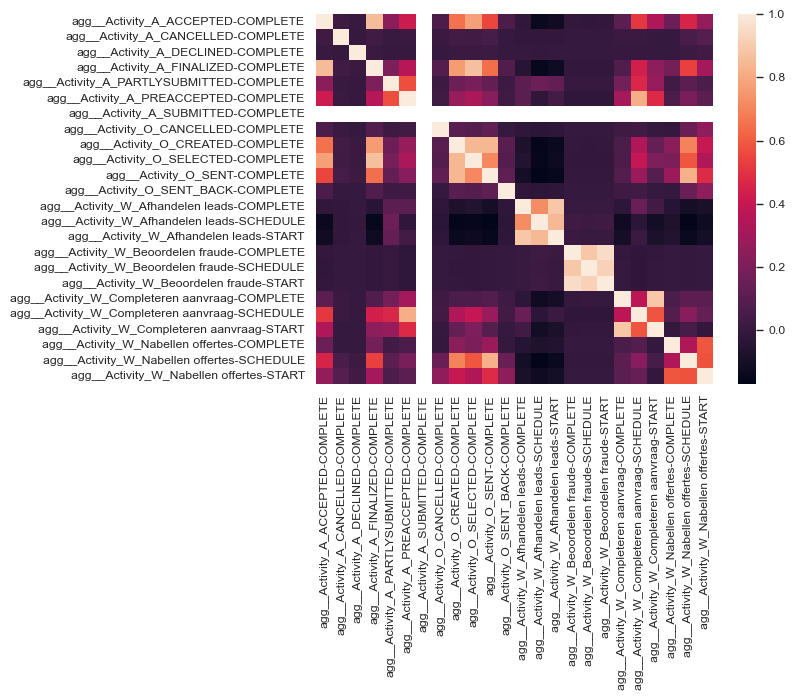

In [4]:
dataset_name = "bpic2012"
bucket = "single"
encoding="agg"
model="xgboost"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))

sample = pd.read_csv(os.path.join(folder_loc, "train_data/train_data_bucket_1.csv"))
activity_cols = [col for col in sample.columns if "Activity" in col]
sns.heatmap(sample[activity_cols].corr())

# Model Accuracy

In [5]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["decision_tree", "logit", "nb"]

for dataset_name in dataset_names:
    print("________________________________________________________")
    for model in models:
        print(dataset_name, model)
        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))
        cls = joblib.load(os.path.join(folder_loc, "cls.joblib"))
        X_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Xtest.csv"), index_col=False, sep=";")
        y_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Ytest.csv"), index_col=False).values
        
        preds = cls.predict(X_test.values)
        print("F1 Score:", f1_score(y_test, preds))

________________________________________________________
breast_cancer decision_tree
F1 Score: 0.8846153846153847
breast_cancer logit
F1 Score: 0.9818181818181818
breast_cancer nb
F1 Score: 0.923076923076923
________________________________________________________
compas decision_tree
F1 Score: 0.6891651865008881
compas logit
F1 Score: 0.7172413793103448
compas nb
F1 Score: 0.7191780821917808
________________________________________________________
diabetes decision_tree
F1 Score: 0.7415730337078651
diabetes logit
F1 Score: 0.6933333333333332
diabetes nb
F1 Score: 0.6575342465753423
________________________________________________________
income decision_tree
F1 Score: 0.8106365834004835
income logit
F1 Score: 0.8128078817733991
income nb
F1 Score: 0.7998439328911432
________________________________________________________
iris decision_tree
F1 Score: 1.0
iris logit
F1 Score: 1.0
iris nb
F1 Score: 1.0
________________________________________________________
mushroom decision_tree
F1 Sc

________________________________________________________
bpic2012 decision_tree single_agg
single
F1 Score: 0.4531779491376789


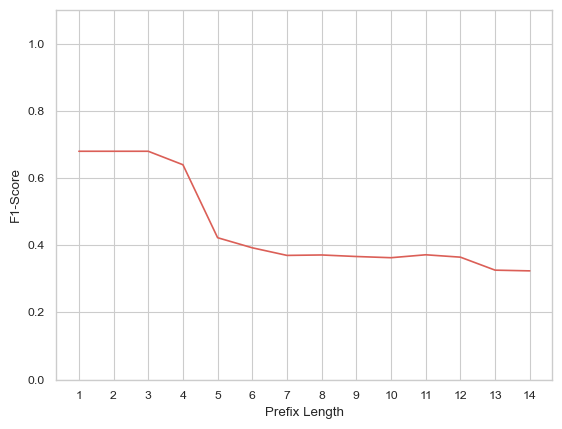

bpic2012 decision_tree prefix_agg
prefix
F1 Score: 0.5744199324846875


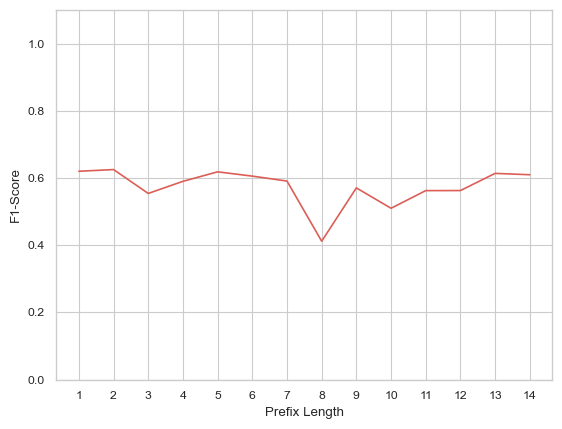

bpic2012 decision_tree prefix_index
prefix
F1 Score: 0.5557332055585257


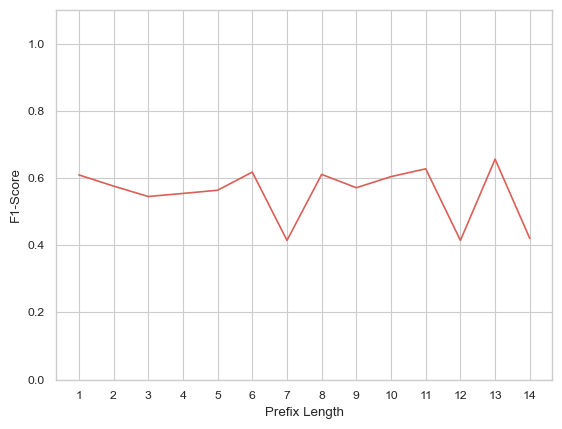

bpic2012 logit single_agg
single
F1 Score: 0.38189855206176543


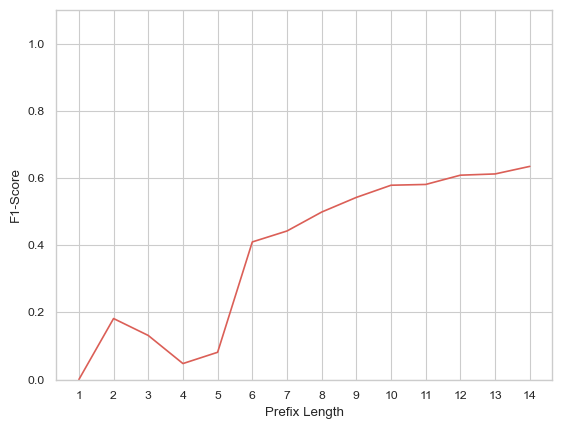

bpic2012 logit prefix_agg
prefix
F1 Score: 0.4842990400438583


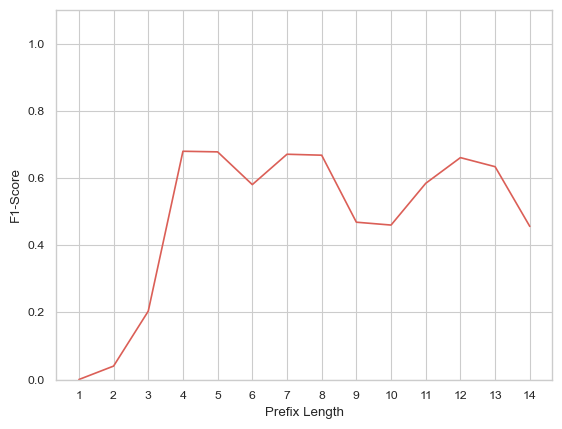

bpic2012 logit prefix_index
prefix
F1 Score: 0.2844119408820578


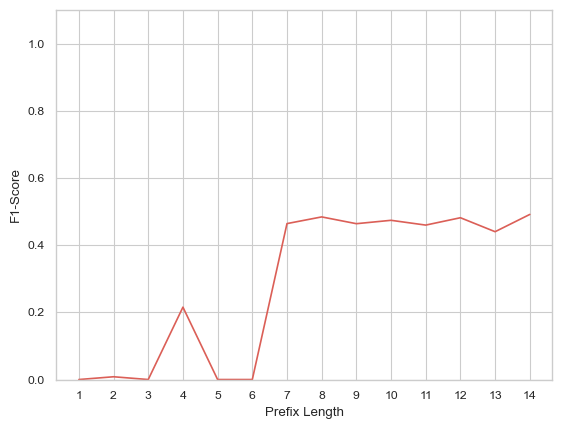

bpic2012 nb single_agg
single
F1 Score: 0.21283027989679873


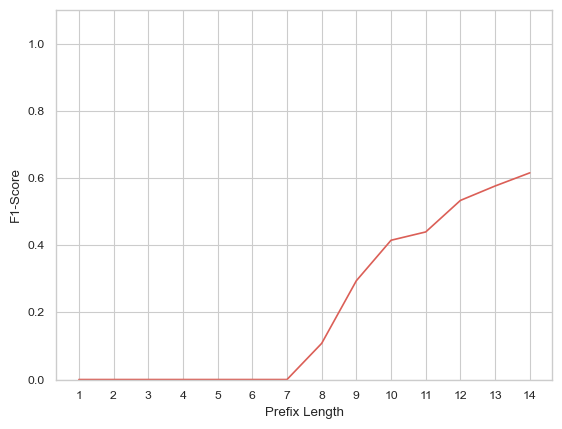

bpic2012 nb prefix_agg
prefix
F1 Score: 0.29133917153796685


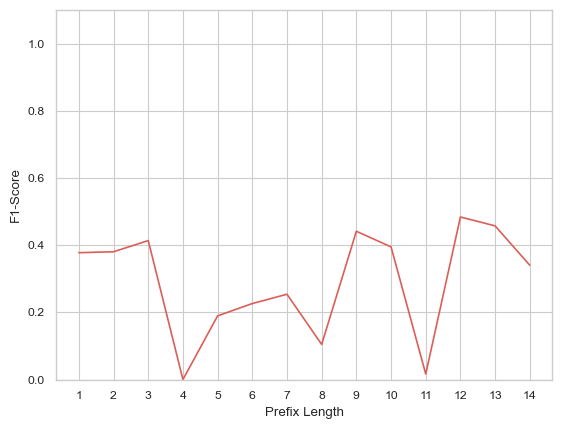

bpic2012 nb prefix_index
prefix
F1 Score: 0.4228874329456604


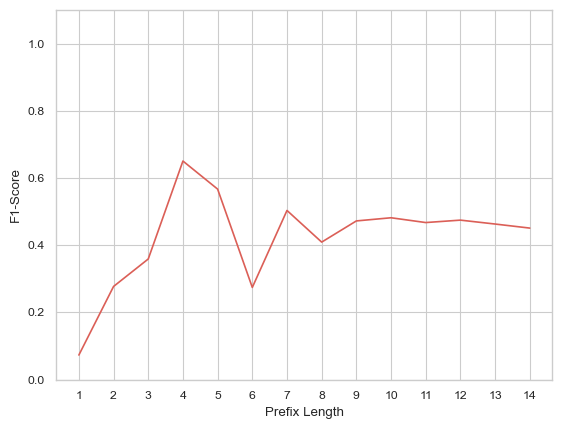

________________________________________________________
sepsis_cases decision_tree single_agg
single
F1 Score: 0.0


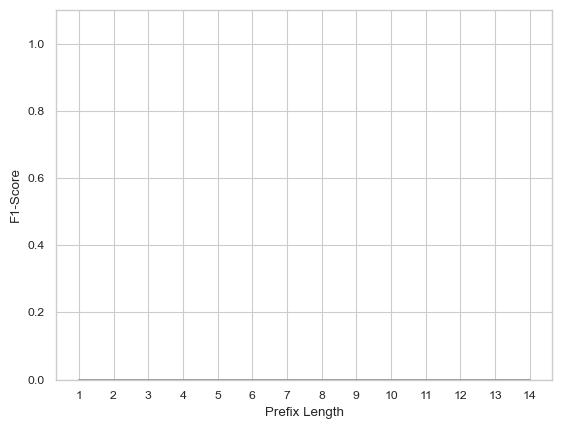

sepsis_cases decision_tree prefix_agg
prefix
F1 Score: 0.21313729253161692


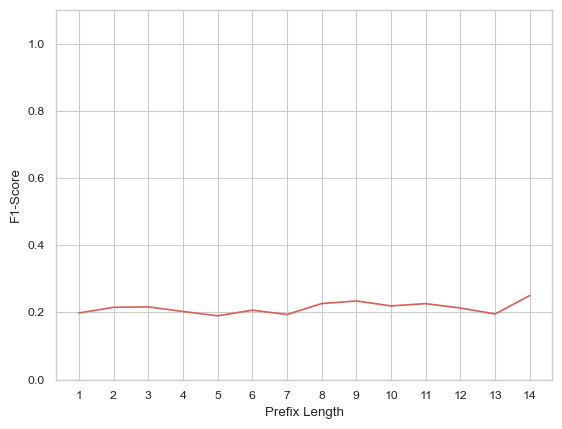

sepsis_cases decision_tree prefix_index
prefix
F1 Score: 0.23497201318567043


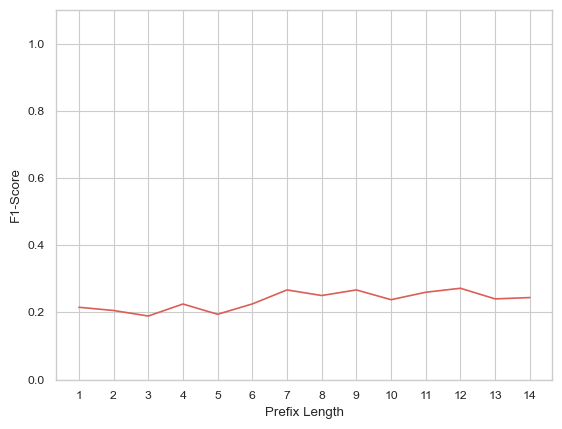

sepsis_cases logit single_agg
single
F1 Score: 0.21954231228739976


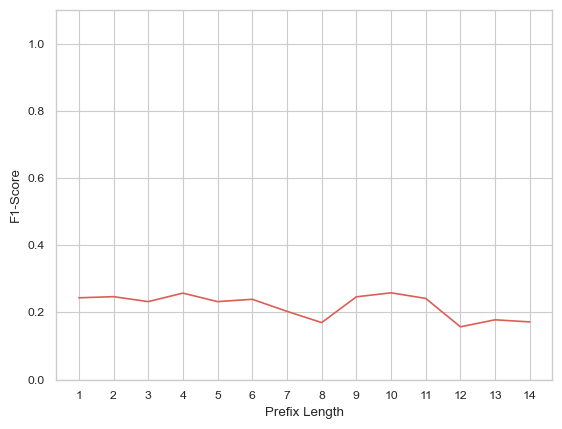

sepsis_cases logit prefix_agg
prefix
F1 Score: 0.2594798252894316


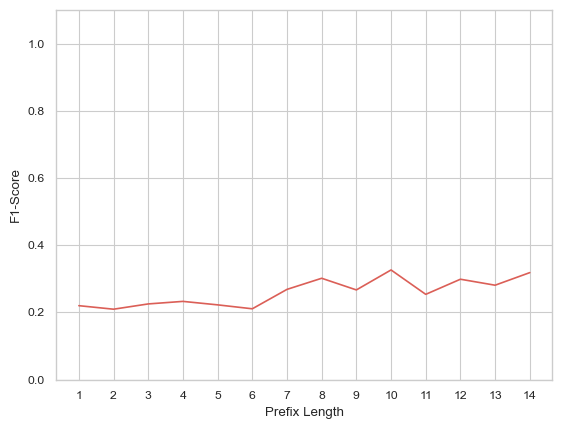

sepsis_cases logit prefix_index
prefix
F1 Score: 0.2361758819986548


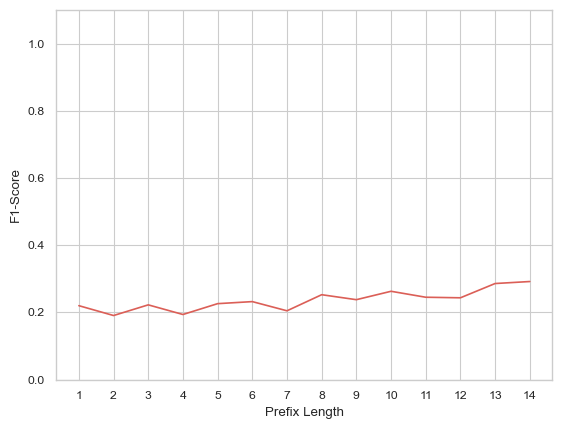

sepsis_cases nb single_agg
single
F1 Score: 0.19666799898973064


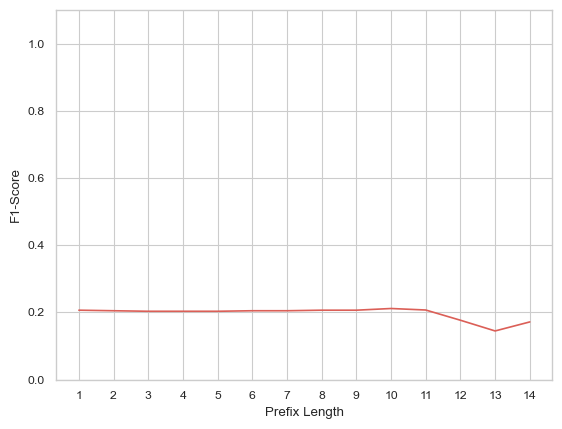

sepsis_cases nb prefix_agg
prefix
F1 Score: 0.19958386595801078


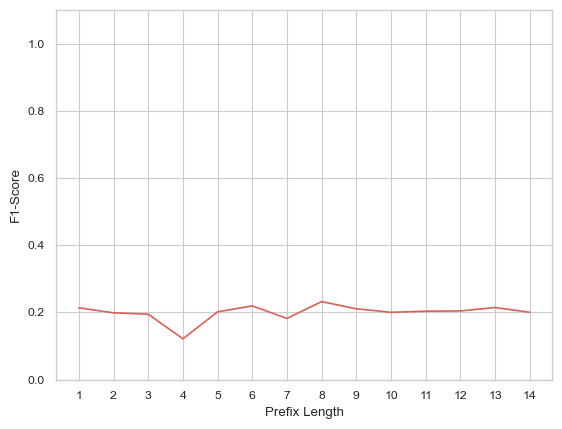

sepsis_cases nb prefix_index
prefix
F1 Score: 0.22128426756775418


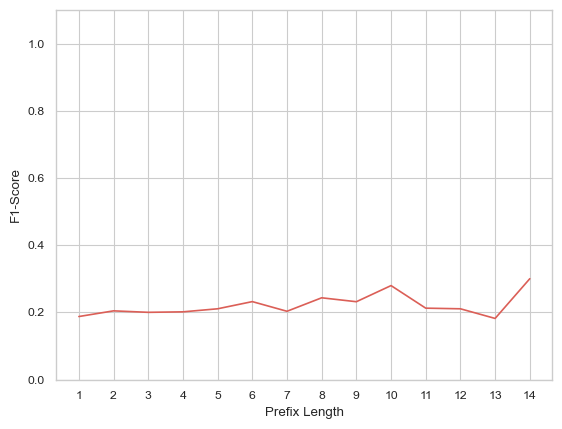

________________________________________________________
production decision_tree single_agg
single
F1 Score: 0.5568640068640069


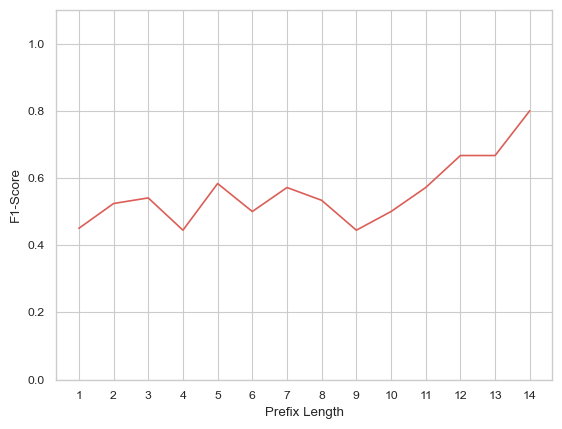

production decision_tree prefix_agg
prefix
F1 Score: 0.7086140983199807


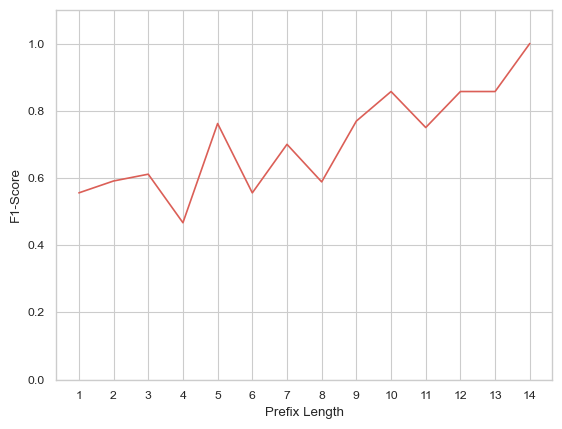

production decision_tree prefix_index
prefix
F1 Score: 0.6785869699779475


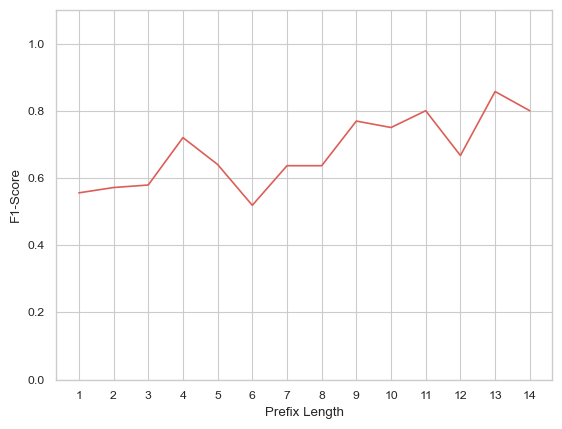

production logit single_agg
single
F1 Score: 0.5810076785411329


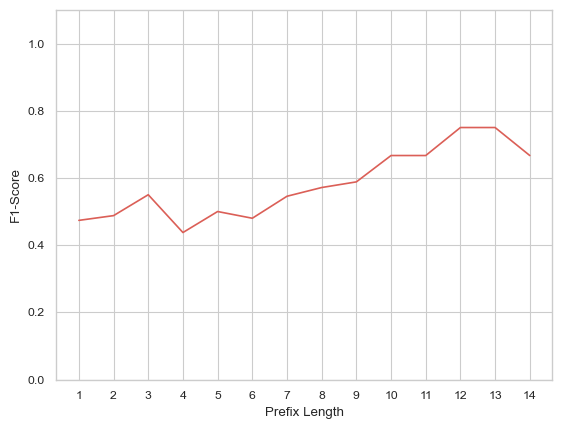

production logit prefix_agg
prefix
F1 Score: 0.5404892100380821


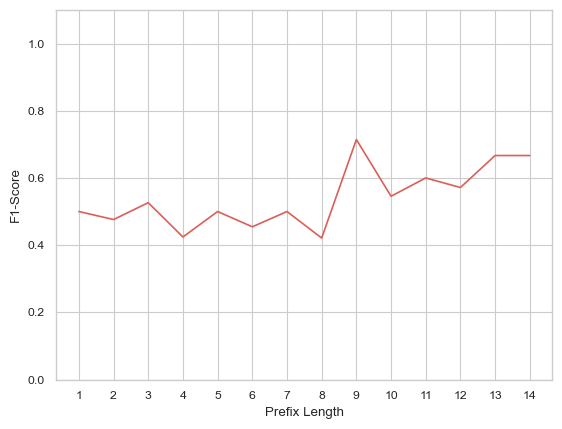

production logit prefix_index
prefix
F1 Score: 0.6266870759902119


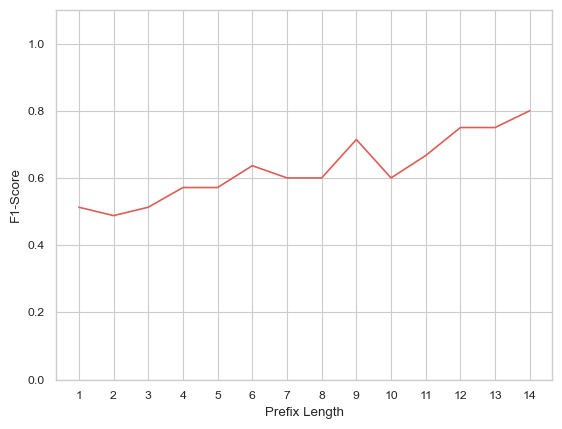

production nb single_agg
single
F1 Score: 0.33600863422292


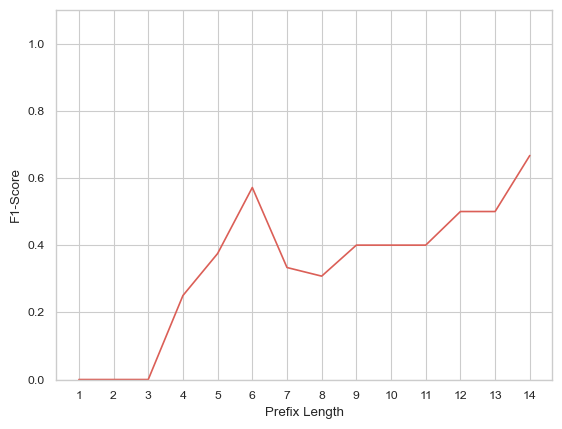

production nb prefix_agg
prefix
F1 Score: 0.5320307069165308


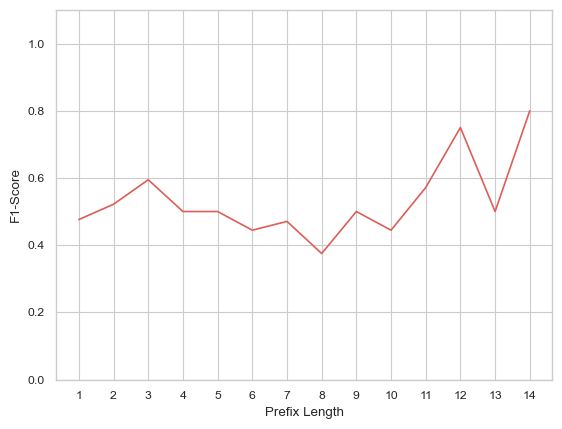

production nb prefix_index
prefix
F1 Score: 0.6203841434213999


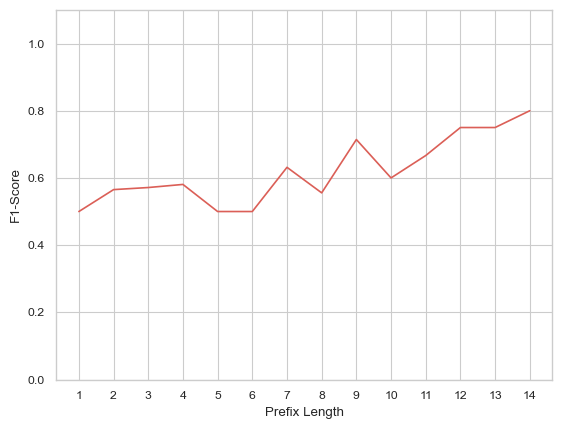

In [6]:
dataset_names = ["bpic2012", "sepsis_cases", "production"]
models= ["decision_tree", "logit", "nb"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]

dataset_ref = {
    "bpic2012" : "bpic2012_accepted",
    "sepsis_cases": "sepsis_cases_1",
    "production" : "production"
}

for dataset_name in dataset_names:
    print("________________________________________________________")
    
    dataset = dataset_ref[dataset_name]
    dataset_manager = DatasetManager(dataset)
    data = dataset_manager.read_dataset()

    min_prefix_length = 1
    max_prefix_length = 14

    dt_train_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/train_prefixes.csv" % (dataset_name)))
    dt_test_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/test_prefixes.csv" % (dataset_name)))
    dt_val_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/val_prefixes.csv" % (dataset_name)))
        
    dt_train_prefixes = pd.concat([dt_train_prefixes, dt_val_prefixes])

    dt_train_prefixes = dataset_manager.generate_prefix_data(dt_train_prefixes, min_prefix_length, max_prefix_length)
    dt_test_prefixes = dataset_manager.generate_prefix_data(dt_test_prefixes, min_prefix_length, max_prefix_length)
    
    for model in models:
        for preproc in preprocs:
            print(dataset_name, model, preproc)
            
            if "single" in preproc:
                bucket_method = "single"
            else:
                bucket_method = "prefix"
            
            folder_loc = os.path.join(PATH, "%s/%s/%s" %(dataset_name,model,preproc))
            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])
            
            bucketer_args = {'encoding_method':"agg",
                         'case_id_col':dataset_manager.case_id_col, 
                         'cat_cols':[dataset_manager.activity_col], 
                         'num_cols':[], 
                         'random_state':22}                
            bucketer = BucketFactory.get_bucketer(bucket_method, **bucketer_args)

            bucket_assignments_train = bucketer.fit_predict(dt_train_prefixes)
            bucket_assignments_test = bucketer.predict(dt_test_prefixes)
            
            f1 = []

            if bucket_method=="single":
                relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == 1]
                X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                y_test = dataset_manager.get_label_numeric(X_test)

                pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_1.joblib'))
                
                for bucket in range(1, max_prefix_length+1):
                    bucket_test = X_test[X_test["prefix_nr"]==bucket]
                    bucket_y = dataset_manager.get_label_numeric(bucket_test)
                    preds = pipeline.predict(bucket_test)
                    f1.append(f1_score(bucket_y, preds))

            else:
                for bucket in range(1, num_buckets+1):
                    relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == bucket]
                    X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                    y_test = dataset_manager.get_label_numeric(X_test)
                    
                    pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_%s.joblib' %(bucket)))
                    
                    preds = pipeline.predict(X_test)
                    
                    f1.append(f1_score(y_test, preds))

            print("F1 Score:", np.mean(f1))

            plt.plot(np.arange(1, max_prefix_length+1, 1), f1)
            plt.xticks(np.arange(1, max_prefix_length+1, 1))
            plt.ylim(0, 1.1)
            plt.xlabel("Prefix Length")
            plt.ylabel("F1-Score")
            plt.show()

# Pick and Choose

In [7]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["decision_tree", "logit", "nb"]

dataset = []
cls = []
sub_stab_mean = []
sub_stab_sd = []
weight_stab_mean = []
weight_stab_sd = []
xai = []
vec_lens = []

for model in models:
    for dataset_name in dataset_names:
        print("________________________________________________________")
        print(dataset_name)
        print(model)
        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))

        sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")
        results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";")#.fillna(1)
        
        print ("LIME Precision")
        print("Overall", np.mean(results["LIME Precision"]))

        print ("LIME Recall")
        print("Overall", np.mean(results["LIME Recall"]))
        
        print ("LIME Correlation")
        print("Overall", np.mean(results["LIME Correlation"]))

        print ("SHAP Precision")
        print("Overall", np.mean(results["SHAP Precision"]))

        print ("SHAP Recall")
        print("Overall", np.mean(results["SHAP Recall"]))
        
        print ("SHAP Correlation")
        print("Overall", np.mean(results["SHAP Correlation"]))
              
        print ("LINDA Precision")
        print("Overall", np.mean(results["LINDA Precision"]))

        print ("LINDA Recall")
        print("Overall", np.mean(results["LINDA Recall"]))
        
        print ("LINDA Correlation")
        print("Overall", np.mean(results["LINDA Correlation"]))
        
        print ("ACV Precision")
        print("Overall", np.mean(results["ACV Precision"]))

        print ("ACV Recall")
        print("Overall", np.mean(results["ACV Recall"]))
        
        print ("ACV Correlation")
        print("Overall", np.mean(results["ACV Correlation"]))


________________________________________________________
breast_cancer
decision_tree
LIME Precision
Overall 1.0
LIME Recall
Overall 0.43250000000000005
LIME Correlation
Overall 0.3337676115829614
SHAP Precision
Overall 1.0
SHAP Recall
Overall 0.5
SHAP Correlation
Overall 0.577732367357982
LINDA Precision
Overall 0.08619333444333435
LINDA Recall
Overall 0.4325
LINDA Correlation
Overall 0.10239426731360285
ACV Precision
Overall 0.26
ACV Recall
Overall 0.24666666666666667
ACV Correlation
Overall 0.2990671788891612
________________________________________________________
compas
decision_tree
LIME Precision
Overall 0.965
LIME Recall
Overall 0.24869047619047627
LIME Correlation
Overall 0.44486479864040057
SHAP Precision
Overall 1.0
SHAP Recall
Overall 0.14285714285714246
SHAP Correlation
Overall 0.7082178891384026
LINDA Precision
Overall 0.33299999999999996
LINDA Recall
Overall 0.11449999999999992
LINDA Correlation
Overall 0.13354341241808962
ACV Precision
Overall 0.7001190476190474
ACV Reca

In [8]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["xgboost", "logit", "nb"]

dataset = []
cls = []
sub = []
weight = []
xai = []
vec_lens = []
probs = []

for model in models:
    for dataset_name in dataset_names:

        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))
        sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")

        results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";")#.fillna(1)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        xai.extend(["SHAP"]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["SHAP Subset Stability"].values)
        weight.extend(results["SHAP Adjusted Weight Stability"].values)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["LIME"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["LIME Subset Stability"].values)
        weight.extend(results["LIME Adjusted Weight Stability"].values)

        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["ACV"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["ACV Subset Stability"].values)
        weight.extend(results["ACV Adjusted Weight Stability"].values)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["LINDA"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["LINDA Subset Stability"].values)
        weight.extend(results["LINDA Adjusted Weight Stability"].values)

df = pd.DataFrame(np.array([dataset, cls, sub, weight, xai, vec_lens, probs]).transpose(), 
                  columns = ["Dataset", "Model", "Subset Stability", "Weight Stability", "XAI Method", "Vector Length", "Prediction Probability"])
df = df.astype({"Dataset": "category", "Model": "category", "Subset Stability": "float32", "Weight Stability": "float32", 
                "XAI Method": "category", "Vector Length": "int32", "Prediction Probability": "float32"})
df.isna().sum()

Dataset                      0
Model                        0
Subset Stability          1582
Weight Stability             0
XAI Method                   0
Vector Length                0
Prediction Probability       0
dtype: int64

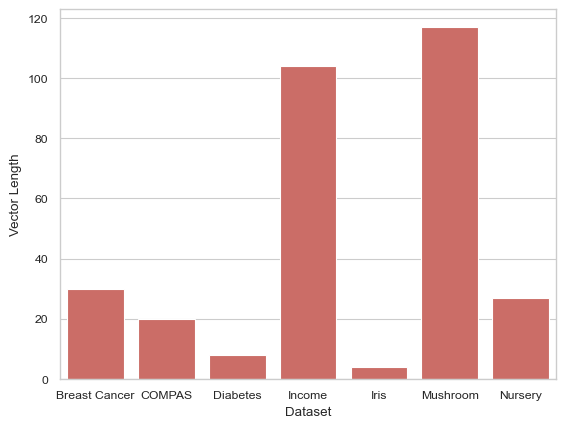

xgboost


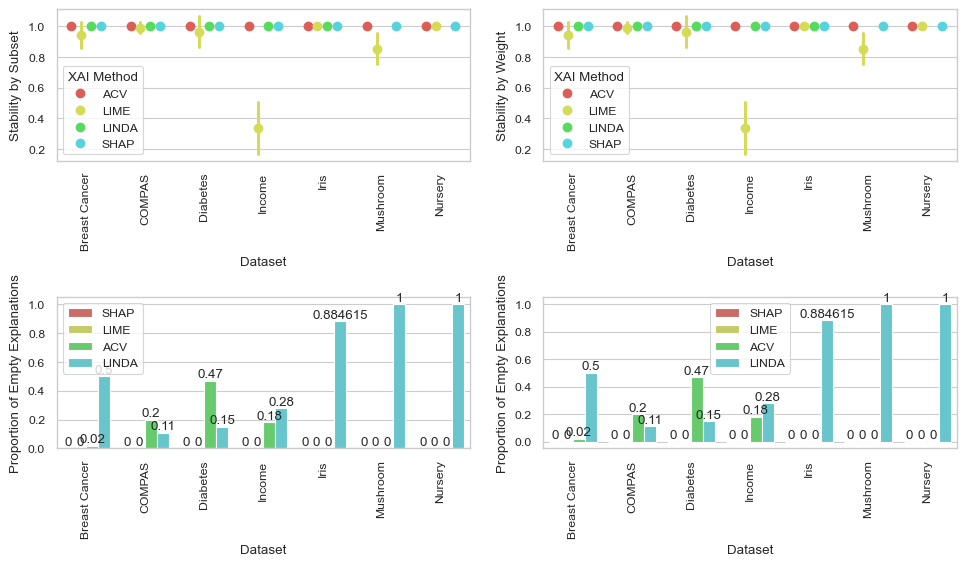

logit


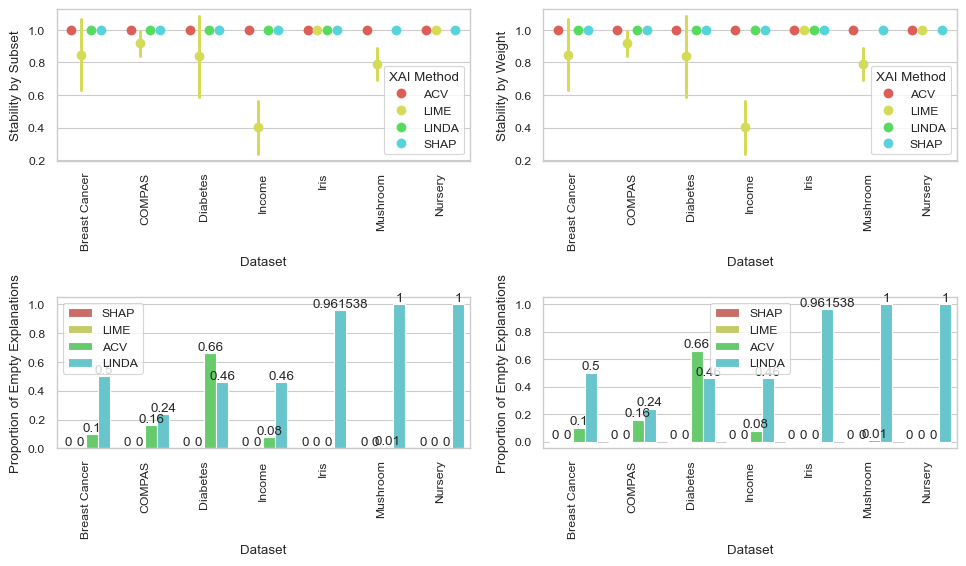

nb


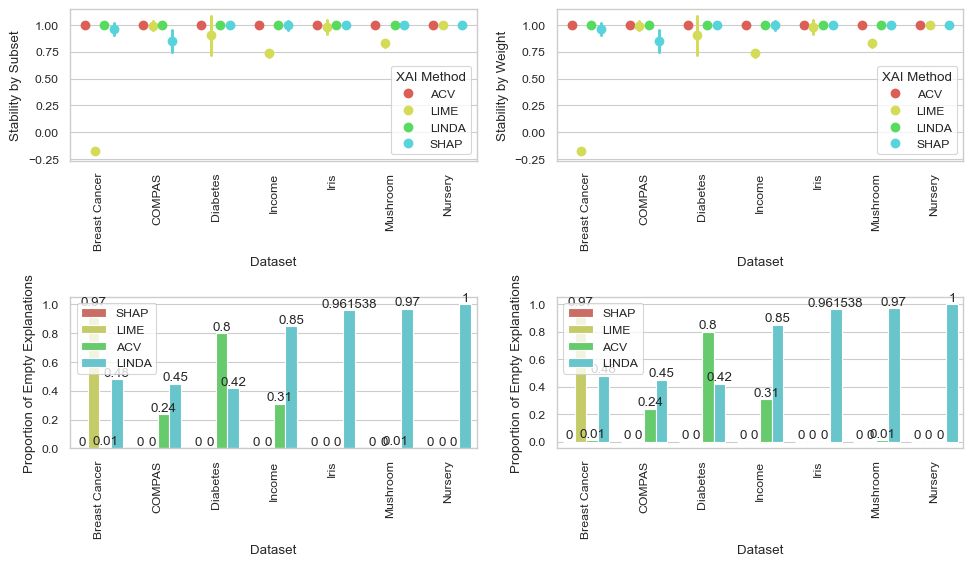

In [9]:
datasets = ["Breast Cancer", "COMPAS", "Diabetes", "Income", "Iris", "Mushroom", "Nursery"]

sns.barplot(data = df, x = "Dataset", y = "Vector Length")
plt.xticks(plt.xticks()[0], labels=datasets)
plt.show()

for model in models:
    print(model)
    mod_df = df[df["Model"]==model]
        
    fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    sns.pointplot(data = mod_df, x = "Dataset", y = "Subset Stability", errorbar="sd", ax=ax[0][0], hue="XAI Method", dodge=0.5, join=False )

    ax[0][0].set_xlabel("Dataset")
    ax[0][0].set_ylabel("Stability by Subset")
    ax[0][0].set_xticklabels(datasets, rotation=90)
        
    sns.pointplot(data = mod_df, x = "Dataset", y = "Subset Stability", errorbar="sd", ax=ax[0][1], hue="XAI Method", dodge=0.5, join=False )
    
    ax[0][1].set_xlabel("Dataset")
    ax[0][1].set_ylabel("Stability by Weight")
    ax[0][1].set_xticklabels(datasets, rotation=90)
    
    data_labels = []
    empty_prop = []
    xai = []
    
    for i in range(len(dataset_names)):
        data = dataset_names[i]
        data_df = mod_df[mod_df["Dataset"]==data]
        for xai_tech in mod_df["XAI Method"].unique():
            xai.append(xai_tech)
            data_labels.append(datasets[i])
            empty_prop.append(data_df[data_df["XAI Method"]==xai_tech]["Subset Stability"].isna().sum()/data_df[data_df["XAI Method"]==xai_tech].shape[0])
            
            
    al = sns.barplot(x = data_labels, y = empty_prop, hue=xai, ax = ax[1][0])
    ax[1][0].set_xlabel("Dataset")
    ax[1][0].set_ylabel("Proportion of Empty Explanations")
    ax[1][0].set_xticklabels(datasets, rotation=90)
    for container in al.containers:
        al.bar_label(container)
    
    data_labels = []
    empty_prop = []
    xai = []
    
    for i in range(len(dataset_names)):
        data = dataset_names[i]
        data_df = mod_df[mod_df["Dataset"]==data]
        for xai_tech in mod_df["XAI Method"].unique():
            xai.append(xai_tech)
            data_labels.append(datasets[i])
            empty_prop.append(data_df[data_df["XAI Method"]==xai_tech]["Subset Stability"].isna().sum()/data_df[data_df["XAI Method"]==xai_tech].shape[0])
            
            
    al = sns.barplot(x = data_labels, y = empty_prop, hue=xai, ax = ax[1][1])
    ax[1][1].set_xlabel("Dataset")
    ax[1][1].set_ylabel("Proportion of Empty Explanations")
    ax[1][1].set_xticklabels(datasets, rotation=90)
    for container in al.containers:
        al.bar_label(container) 
    plt.ylim(-0.05, 1.05)

    fig.tight_layout(pad=2)
    plt.show()

In [10]:
prob = []
linda_attr = []
acv_attr = []
grouped = df.groupby(["Dataset", "Model"])
for _,group in grouped:
    prob.append(np.mean(group["Prediction Probability"].values))
    linda_attr.append(group[group["XAI Method"]=="LINDA"]["Subset Stability"].isna().sum()/group[group["XAI Method"]=="LINDA"].shape[0])
    acv_attr.append(group[group["XAI Method"]=="ACV"]["Subset Stability"].isna().sum()/group[group["XAI Method"]=="ACV"].shape[0])

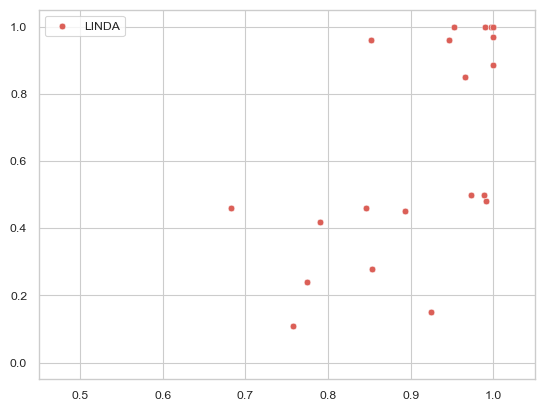

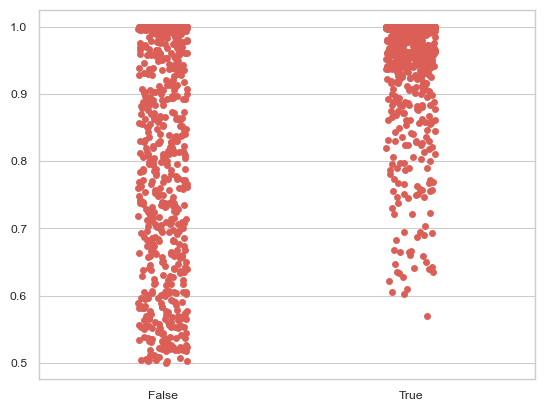

In [11]:
sns.scatterplot(x=prob, y=linda_attr, label = "LINDA")
plt.xlim(0.45, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

prob = df[df["XAI Method"]=="LINDA"]["Prediction Probability"].values
linda_attr = df[df["XAI Method"]=="LINDA"]["Subset Stability"].isna().values
sns.stripplot(x = linda_attr, y=prob)
plt.show()

In [12]:
dataset_name = "sepsis_cases"
bucket = "prefix"
encoding="index"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))

num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

results = []

for bucket in range(1, num_buckets+1):
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    results.append(pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep=";"))

    vec_lens.append(sample.shape[1])
    
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

results = pd.concat(results)

print("Overall")
print("LIME Precision", np.mean(results["LIME Precision"]))
print("LIME Recall", np.mean(results["LIME Recall"]))
print("LIME Correlation", np.mean(results["LIME Correlation"]))
print("\n")

print("SHAP Precision", np.mean(results["SHAP Precision"]))
print("SHAP Recall", np.mean(results["SHAP Recall"]))
print("SHAP Correlation", np.mean(results["SHAP Correlation"]))
print("\n")

if encoding!='index':
    print("LINDA Precision", np.mean(results["LINDA Precision"]))
    print("LINDA Recall", np.mean(results["LINDA Recall"]))
    print("LINDA Correlation", np.mean(results["LINDA Correlation"]))    

grouped = results.groupby("Prefix Length")
for _, group in grouped:
    print(_)
    print("SHAP Precision", np.mean(group["SHAP Precision"]))
    print("LIME Precision", np.mean(group["LIME Precision"]))
    print("\n")
    
    print("SHAP Recall", np.mean(group["SHAP Recall"]))
    print("LIME Recall", np.mean(group["LIME Recall"]))
    print("\n")
    
    print("SHAP Correlation", np.mean(group["SHAP Correlation"]))
    print("LIME Correlation", np.mean(group["LIME Correlation"]))    
    print("\n---------------------\n")

Overall
LIME Precision 0.055672799422799416
LIME Recall 0.1016941391941392
LIME Correlation 0.45370113440952237


SHAP Precision 0.6919642857142857
SHAP Recall 0.6640731292517007
SHAP Correlation 0.2672476023598201


1
SHAP Precision 0.75
LIME Precision 0.0


SHAP Recall 0.75
LIME Recall 0.0


SHAP Correlation 0.13783917165446052
LIME Correlation 0.5804248960261078

---------------------

2
SHAP Precision 0.75
LIME Precision 0.125


SHAP Recall 0.75
LIME Recall 0.125


SHAP Correlation 0.2853866979717561
LIME Correlation 0.5324829448196206

---------------------

3
SHAP Precision 0.875
LIME Precision 0.03125


SHAP Recall 0.875
LIME Recall 0.125


SHAP Correlation 0.19587271950905283
LIME Correlation 0.58360007424743

---------------------

4
SHAP Precision 0.625
LIME Precision 0.0


SHAP Recall 0.625
LIME Recall 0.0


SHAP Correlation 0.2995675449886376
LIME Correlation 0.5543754218031093

---------------------

5
SHAP Precision 0.625
LIME Precision 0.17083333333333334


SHAP Recall 0

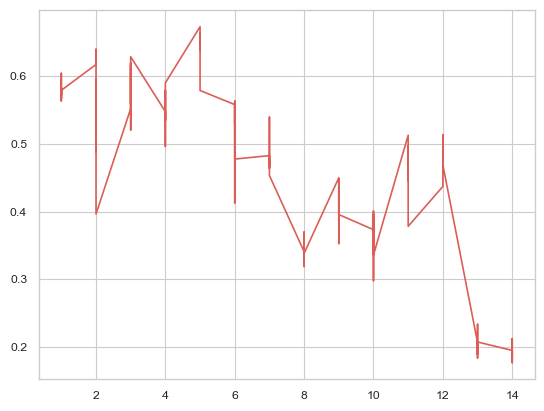

In [13]:
plt.plot(results["Prefix Length"], results["LIME Correlation"])

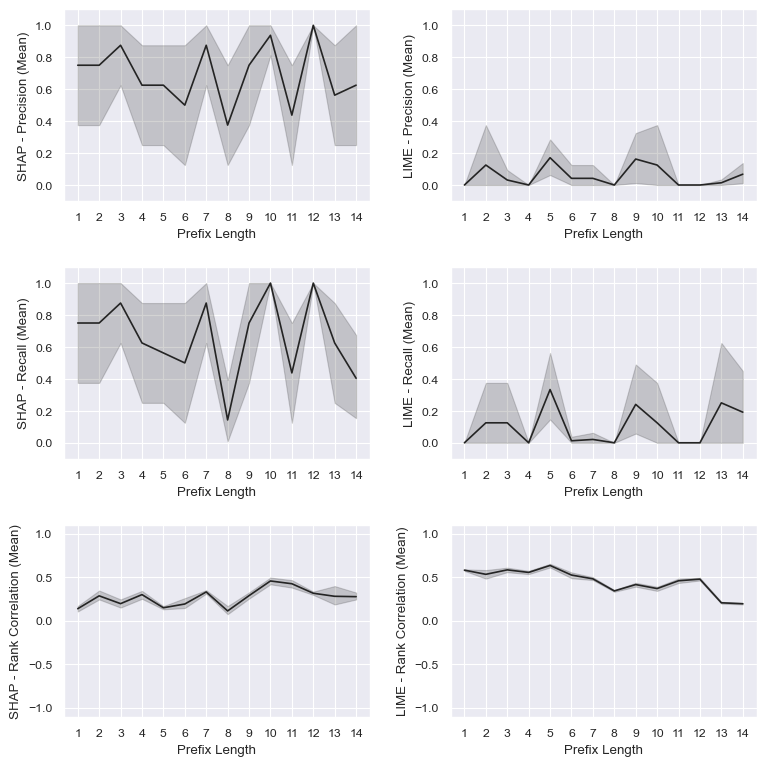

In [14]:
sns.set_theme(context = "paper", style="darkgrid")
sns.set_palette("gray")

dataset_name = "sepsis_cases"
bucketing = "prefix"
encoding="index"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucketing, encoding))

num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

for bucket in range(1, num_buckets+1):
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    vec_lens.append(sample.shape[1])
    
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";")#.fillna(1)
grouped = results.groupby("Prefix Length")

if encoding=="index":
    fig, ax = plt.subplots(3, 2, figsize=(8,8))
else:
    fig, ax = plt.subplots(3, 3, figsize=(12, 8))

########################SHAP GRAPHS########################
sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "SHAP Precision", 
             errorbar=("ci",95), err_style="band", ax=ax[0][0], label="Precision", legend=False)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_ylim(-0.1,1.1)
#ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[0][0].set_ylabel("SHAP - Precision (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "SHAP Recall", errorbar=("ci",95), 
             err_style="band", ax=ax[1][0], label="Recall", legend=False)
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_ylim(-0.1,1.1)
plt.xlabel("Prefix Length")
ax[1][0].set_ylabel("SHAP - Recall (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "SHAP Correlation", errorbar=("ci",95), 
             err_style="band", ax=ax[2][0], label="Correlation", legend=False)
ax[2][0].set_xticks(x_ticks)
ax[2][0].set_ylim(-1.1,1.1)
plt.xlabel("Prefix Length")
ax[2][0].set_ylabel("SHAP - Rank Correlation (Mean)")
# filename = "%s__%s_%s_%s.pdf"%(dataset_name,bucketing,encoding,model)
# fig.tight_layout(pad=2)
# plt.savefig(os.path.join('figures', "internal_correctness", filename), format='pdf')
# plt.show()

########################LIME GRAPHS########################
sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LIME Precision", 
errorbar=("ci",95), err_style="band", ax=ax[0][1], label="Precision", legend=False)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_ylim(-0.1,1.1)
#ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[0][1].set_ylabel("LIME - Precision (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LIME Recall", errorbar=("ci",95), 
             err_style="band", ax=ax[1][1], label="Recall", legend=False)
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_ylim(-0.1,1.1)
plt.xlabel("Prefix Length")
ax[1][1].set_ylabel("LIME - Recall (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LIME Correlation", errorbar=("ci",95), 
             err_style="band", ax=ax[2][1], label="Correlation", legend=False)
ax[2][1].set_xticks(x_ticks)
ax[2][1].set_ylim(-1.1,1.1)
plt.xlabel("Prefix Length")
ax[2][1].set_ylabel("LIME - Rank Correlation (Mean)")

########################LINDA GRAPHS########################
if encoding!="index":
    sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LINDA Precision", 
    errorbar=("ci",95), err_style="band", ax=ax[0][2], label="Precision", legend=False)
    ax[0][2].set_xticks(x_ticks)
    ax[0][2].set_ylim(-0.1,1.1)
    #ax2.set_ylim(1,1400)
    plt.xlabel("Prefix Length")
    ax[0][2].set_ylabel("LINDA-BN - Precision (Mean)")

    sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LINDA Recall", errorbar=("ci",95), 
                 err_style="band", ax=ax[1][2], label="Recall", legend=False)
    ax[1][2].set_xticks(x_ticks)
    ax[1][2].set_ylim(-0.1,1.1)
    plt.xlabel("Prefix Length")
    ax[1][2].set_ylabel("LINDA-BN - Recall (Mean)")

    sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LINDA Correlation", errorbar=("ci",95), 
                 err_style="band", ax=ax[2][2], label="Correlation", legend=False)
    ax[2][2].set_xticks(x_ticks)
    ax[2][2].set_ylim(-1.1,1.1)
    plt.xlabel("Prefix Length")
    ax[2][2].set_ylabel("LINDA-BN - Rank Correlation (Mean)")

filename = "%s__%s_%s_%s.pdf"%(dataset_name,bucketing,encoding,model)
fig.tight_layout(pad=2)
plt.savefig(os.path.join('figures', "internal_correctness", filename), format='pdf')
plt.show()


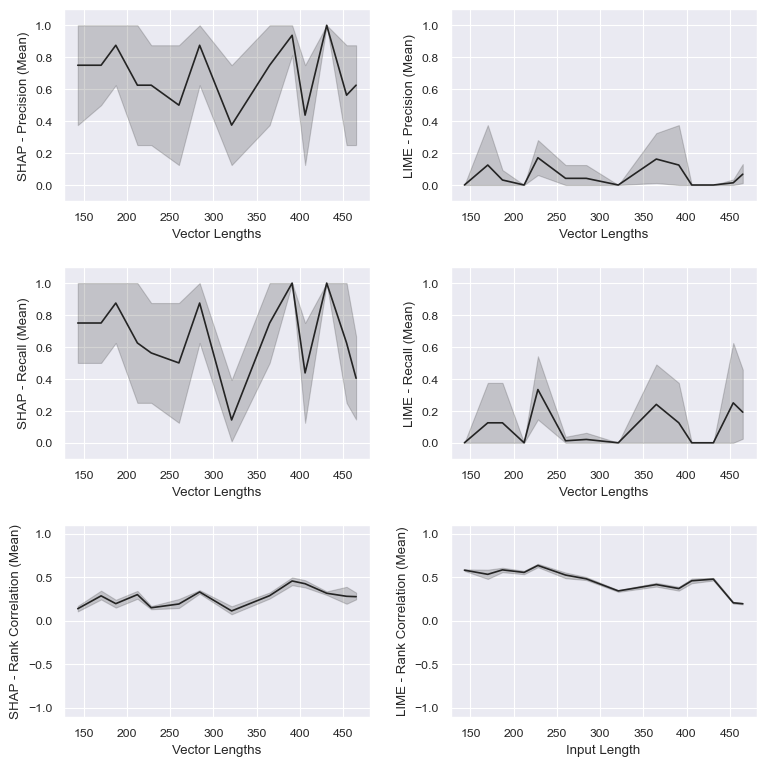

In [15]:
prefixes = results["Prefix Length"].tolist()
vectors = [vec_lens[int(i)-1] for i in prefixes]
results["Vector Lengths"] = vectors

if encoding=="index":
    fig, ax = plt.subplots(3, 2, figsize=(8,8))
else:
    fig, ax = plt.subplots(3, 3, figsize=(12,8))
    
########################SHAP GRAPHS########################
sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "SHAP Precision", errorbar=("ci",95), 
             err_style="band", ax=ax[0][0], label="Precision", legend=False)
ax[0][0].set_ylim(-0.1,1.1)
#ax2.set_ylim(1,1400)
plt.xlabel("Input Length")
ax[0][0].set_ylabel("SHAP - Precision (Mean)")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "SHAP Recall", errorbar=("ci",95), 
             err_style="band", ax=ax[1][0], label="Recall", legend=False)
ax[1][0].set_ylim(-0.1,1.1)
#ax2.set_ylim(1,1400)
plt.xlabel("Input Length")
ax[1][0].set_ylabel("SHAP - Recall (Mean)")
#ax2.set_ylabel("Vector Length")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "SHAP Correlation", errorbar=("ci",95), 
             err_style="band", ax=ax[2][0], label="Correlation", legend=False)
ax[2][0].set_ylim(-1.1,1.1)
plt.xlabel("Input Length")
ax[2][0].set_ylabel("SHAP - Rank Correlation (Mean)")

########################LIME GRAPHS########################
sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LIME Precision", errorbar=("ci",95), 
             err_style="band", ax=ax[0][1], label="Precision", legend=False)
ax[0][1].set_ylim(-0.1,1.1)
#ax2.set_ylim(1,1400)
plt.xlabel("Input Length")
ax[0][1].set_ylabel("LIME - Precision (Mean)")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LIME Recall", errorbar=("ci",95), 
             err_style="band", ax=ax[1][1], label="Recall", legend=False)
ax[1][1].set_ylim(-0.1,1.1)
#ax2.set_ylim(1,1400)
plt.xlabel("Input Length")
ax[1][1].set_ylabel("LIME - Recall (Mean)")
#ax2.set_ylabel("Vector Length")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LIME Correlation", errorbar=("ci",95), 
             err_style="band", ax=ax[2][1], label="Correlation", legend=False)
ax[2][1].set_ylim(-1.1,1.1)
plt.xlabel("Input Length")
ax[2][1].set_ylabel("LIME - Rank Correlation (Mean)")

########################LINDA GRAPHS########################
if encoding!="index":
    sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LINDA Precision", errorbar=("ci",95), 
                 err_style="band", ax=ax[0][2], label="Precision", legend=False)
    ax[0][2].set_ylim(-0.1,1.1)
    #ax2.set_ylim(1,1400)
    plt.xlabel("Input Length")
    ax[0][2].set_ylabel("LINDA-BN - Precision (Mean)")

    sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LINDA Recall", errorbar=("ci",95), 
                 err_style="band", ax=ax[1][2], label="Recall", legend=False)
    ax[1][2].set_ylim(-0.1,1.1)
    #ax2.set_ylim(1,1400)
    plt.xlabel("Input Length")
    ax[1][2].set_ylabel("LINDA-BN - Recall (Mean)")
    #ax2.set_ylabel("Vector Length")

    sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LINDA Correlation", errorbar=("ci",95), 
                 err_style="band", ax=ax[2][2], label="Correlation", legend=False)
    ax[2][2].set_ylim(-1.1,1.1)
    plt.xlabel("Input Length")
    ax[2][2].set_ylabel("LINDA-BN - Rank Correlation (Mean)")



fig.tight_layout(pad=2)
filename = "%s__%s_%s_%s_vec.pdf"%(dataset_name,bucketing,encoding,model)
plt.savefig(os.path.join('figures', "internal_correctness",filename), format='pdf')
plt.show()

# Significance Testing

In [16]:
def f1_calc(prec, rec):
    if prec == 0 and rec == 0:
        return 0
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

In [17]:
datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models = ["decision_tree", "logit", "nb"]
cls_xai = ["LIME", "SHAP", "LINDA", "ACV"]

data_names = {"breast_cancer":"Breast Cancer", "compas": "COMPAS", "diabetes":"Diabetes", "income": "Adult Income",
              "iris": "Iris", "mushroom": "Mushroom", "nursery": "Nursery"}

orig_data = pd.DataFrame()
cls_results = pd.DataFrame()

for data in datasets:
    X_test = pd.read_csv("%s/datasets/%s_Xtest.csv"%(data, data), sep=';')
    y_test = pd.read_csv("%s/datasets/%s_ytest.csv"%(data, data), sep=';')
    
    for model in models:
        results = pd.read_csv(os.path.join(PATH, data, model, "results.csv"), sep = ";")
        cls = joblib.load(os.path.join(PATH, data, model, "cls.joblib"))
        
#         accuracy = accuracy_score(results["Actual"], results["Prediction"])
#         f1 = f1_score(results["Actual"], results["Prediction"])
        
        accuracy = accuracy_score(y_test, cls.predict(X_test))
        f1 = f1_score(y_test, cls.predict(X_test))
        
        results["Model Accuracy"] = [accuracy]*results.shape[0]
        results["F1 Score"] = [f1]*results.shape[0]
        
        results["Model"] = [model]*results.shape[0]
        results["Dataset"] = [data_names[data]]*results.shape[0]
        results["Dataset Type"] = ["Classification"]*results.shape[0]
        
        orig_data = orig_data.append(results)
        cls_results = cls_results.append(results)
        
cls_results["SHAP F1"] = cls_results.apply(lambda x: f1_calc(x["SHAP Precision"], x["SHAP Recall"]), axis=1)
cls_results["LIME F1"] = cls_results.apply(lambda x: f1_calc(x["LIME Precision"], x["LIME Recall"]), axis=1)
cls_results["LINDA F1"] = cls_results.apply(lambda x: f1_calc(x["LINDA Precision"], x["LINDA Recall"]), axis=1)
cls_results["ACV F1"] = cls_results.apply(lambda x: f1_calc(x["ACV Precision"], x["ACV Recall"]), axis=1)

In [18]:
cls_precision_columns = [method+" Precision" for method in cls_xai]
cls_recall_columns = [method+" Recall" for method in cls_xai]
cls_f1_columns = [method+" F1" for method in cls_xai]
cls_corr_columns = [method+" Correlation" for method in cls_xai]

all_cls_cols = []
all_cls_cols.extend(cls_precision_columns)
all_cls_cols.extend(cls_recall_columns)
all_cls_cols.extend(cls_corr_columns)

def f1_calc(prec, rec):
    if prec == 0 and rec == 0:
        return 0
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

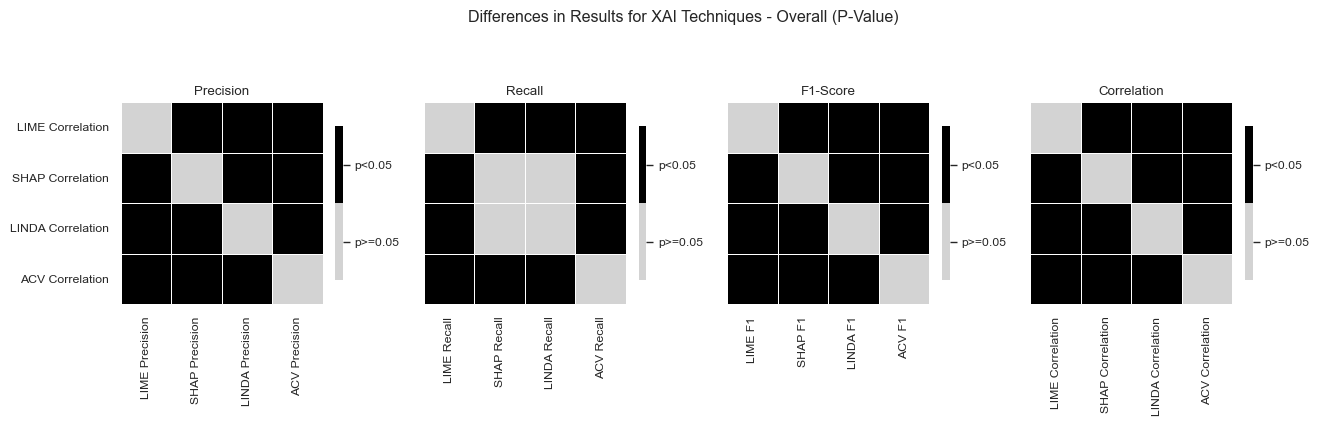

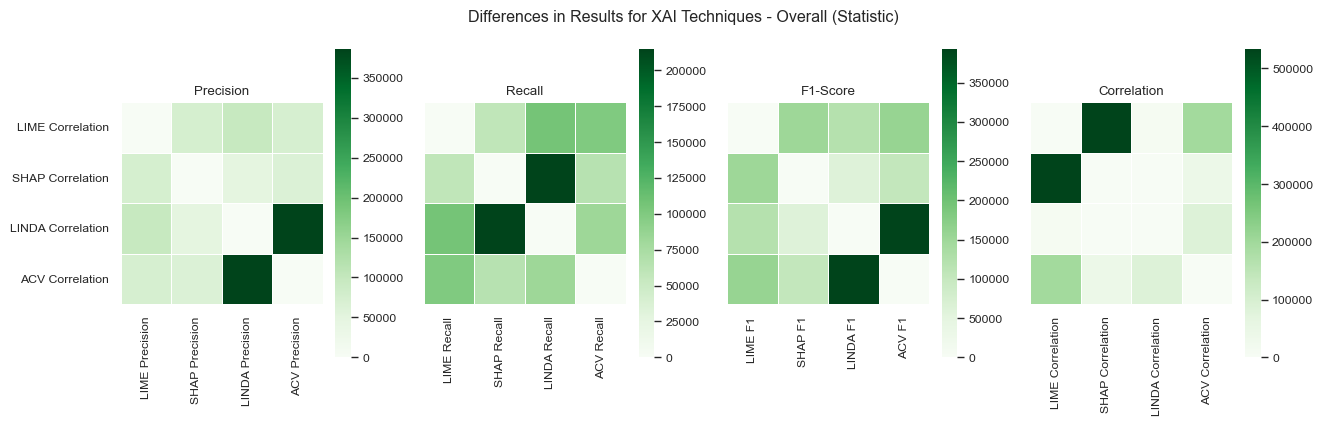

In [19]:
metrics = [cls_precision_columns, cls_recall_columns, cls_f1_columns, cls_corr_columns]
fig, ax = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
fig2, ax2 = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
metric_name = ["Precision", "Recall", "F1-Score", "Correlation"]

colors = ["lightgray", "black"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

df_list = []

cls_results = cls_results.fillna(0)

for i in range(len(metrics)):
    pval_mat = np.zeros((len(metrics), len(metrics)))
    stat_mat = np.zeros((len(metrics), len(metrics)))
    ind = np.diag_indices_from(pval_mat)
    pval_mat[ind] = 1
    
    metric_df = []
    
    for comb in itertools.combinations(metrics[i], 2):
        res = scipy.stats.wilcoxon(cls_results[comb[0]], cls_results[comb[1]], method="approx")
        l1 = list(metrics[i]).index(comb[0])
        l2 = list(metrics[i]).index(comb[1])
        
        pval = res.pvalue
        statistic = res.statistic
        zstatistic = res.zstatistic
        
        pval_mat[l1][l2] = pval
        pval_mat[l2][l1] = pval
        
        stat_mat[l1][l2] = statistic
        stat_mat[l2][l1] = statistic
        
        metric_df.append([comb[0], comb[1], round(statistic), round(zstatistic, 2), round(pval, 2)])
        
    mask = np.triu(pval_mat)
    sig = np.where(pval_mat<0.05, 1, 0)

    hmp=sns.heatmap(sig, square=True, annot=False, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .5}, 
                xticklabels = metrics[i], yticklabels = metrics[i], ax = ax[i])
    
    sns.heatmap(stat_mat, square = True, annot=False, linewidths = 0.5, cmap="Greens", 
               xticklabels = metrics[i], yticklabels = metrics[i], ax = ax2[i])


    colorbar = hmp.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['p>=0.05', 'p<0.05' ])
    
    ax[i].title.set_text(metric_name[i])
    ax2[i].title.set_text(metric_name[i])
   
    for entry in metric_df:
        xai1 = entry[0]
        xai2 = entry[1]
        entry[0] = xai1.split(" ")[0]
        entry[1] = xai2.split(" ")[0]
        
    metric_df = pd.DataFrame(metric_df, columns = ["XAI1", "XAI2", metric_name[i]+" Test Statistic", 
                                                   metric_name[i]+" Z", metric_name[i]+" P-Value"])
    metric_df = metric_df.set_index(["XAI1", "XAI2"])
    df_list.append(metric_df)

fig.suptitle("Differences in Results for XAI Techniques - Overall (P-Value)")
fig2.suptitle("Differences in Results for XAI Techniques - Overall (Statistic)")

plt.show()

In [20]:
df = pd.concat(df_list, axis=1, ignore_index=False, join="inner")
df[df.columns].round(1)#.set_index(["XAI1", "XAI2", "Metric"])

Precision Test Statistic  Precision Z  Precision P-Value  \
XAI1  XAI2                                                              
LIME  SHAP                      74587         -9.6                0.0   
      LINDA                     97867        -28.8                0.0   
      ACV                       73588        -25.4                0.0   
SHAP  LINDA                     48690        -33.0                0.0   
      ACV                       64474        -29.0                0.0   
LINDA ACV                      385472        -11.1                0.0   

             Recall Test Statistic  Recall Z  Recall P-Value  \
XAI1  XAI2                                                     
LIME  SHAP                   58856     -16.3             0.0   
      LINDA                 106696     -11.7             0.0   
      ACV                   100208     -15.3             0.0   
SHAP  LINDA                 214391      -0.8             0.4   
      ACV                    64542     -25.4             0.0   
LINDA ACV                    82189     -23.1             0.0   

             F1-Score Test Statistic  F1-Score Z  F1-Score P-Value  \
XAI1  XAI2                                                           
LIME  SHAP                    151263       -11.5               0.0   
      LINDA                   121420       -27.5               0.0   
      ACV                     157852       -20.7               0.0   
SHAP  LINDA                    59788       -33.5               0.0   
      ACV                     103600       -27.9               0.0   
LINDA ACV                     392239       -11.6               0.0   

             Correlation Test Statistic  Correlation Z  Correlation P-Value  
XAI1  XAI2                                                                   
LIME  SHAP                       532972          -13.2                  0.0  
      LINDA                        9866          -37.0                  0.0  
      ACV                        196736          -29.1                  0.0  
SHAP  LINDA                        1164          -37.5                  0.0  
      ACV                         43402          -35.6                  0.0  
LINDA ACV                         84702          -29.6                  0.0

In [21]:
datasets = ["bpic2012", "production", "sepsis_cases"]#, "income", "iris", "mushroom", "nursery"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
models = ["decision_tree", "logit", "nb"]
el_xai = ["LIME", "SHAP", "LINDA"]#, "ACV"]

data_names = {"bpic2012":"BPIC2012", "production": "Production", "sepsis_cases":"Sepsis Cases"}

orig_data = pd.DataFrame()
el_results = pd.DataFrame()

for data in datasets:
    for preproc in preprocs:
        for model in models:
            results = []
            folder_loc = os.path.join(data, model, preproc)
            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

            for bucket in range(1, num_buckets+1):
                results.append(pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep=";"))
            
            results = pd.concat(results)
            #print(results.columns)
            
            accuracy = accuracy_score(results["Actual"], results["Prediction"])
            f1 = f1_score(results["Actual"], results["Prediction"])

            results["Model Accuracy"] = [accuracy]*results.shape[0]
            results["F1 Score"] = [f1]*results.shape[0]

            results["Model"] = [model]*results.shape[0]
            results["Dataset"] = [data_names[data]]*results.shape[0]
            results["Dataset Type"] = ["Classification"]*results.shape[0]
            results["Preprocessing"] = [preproc]*results.shape[0]

            orig_data = orig_data.append(results)
            el_results = el_results.append(results)
        
el_results["SHAP F1"] = el_results.apply(lambda x: f1_calc(x["SHAP Precision"], x["SHAP Recall"]), axis=1)
el_results["LIME F1"] = el_results.apply(lambda x: f1_calc(x["LIME Precision"], x["LIME Recall"]), axis=1)
el_results["LINDA F1"] = el_results.apply(lambda x: f1_calc(x["LINDA Precision"], x["LINDA Recall"]), axis=1)
#el_results["ACV F1"] = el_results.apply(lambda x: f1_calc(x["ACV Precision"], x["ACV Recall"]), axis=1)

In [22]:
el_precision_columns = [method+" Precision" for method in el_xai]
el_recall_columns = [method+" Recall" for method in el_xai]
el_f1_columns = [method+" F1" for method in el_xai]
el_corr_columns = [method+" Correlation" for method in el_xai]

prefix_agg


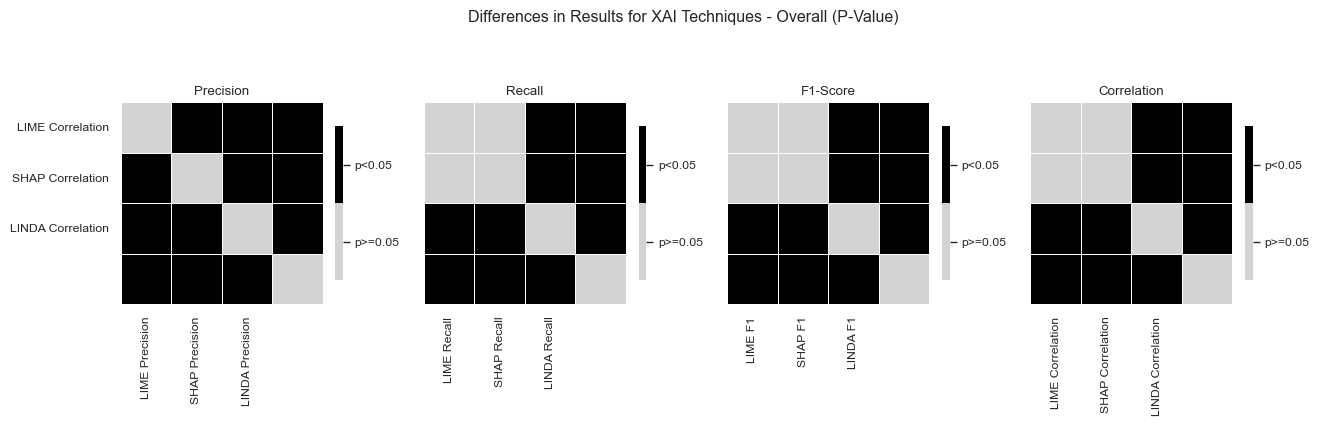

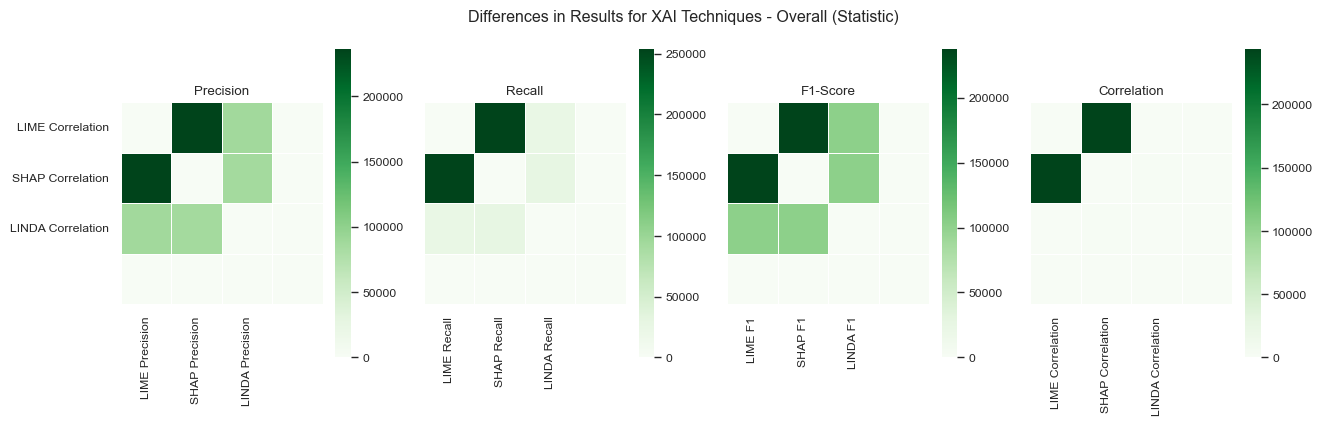

prefix_index


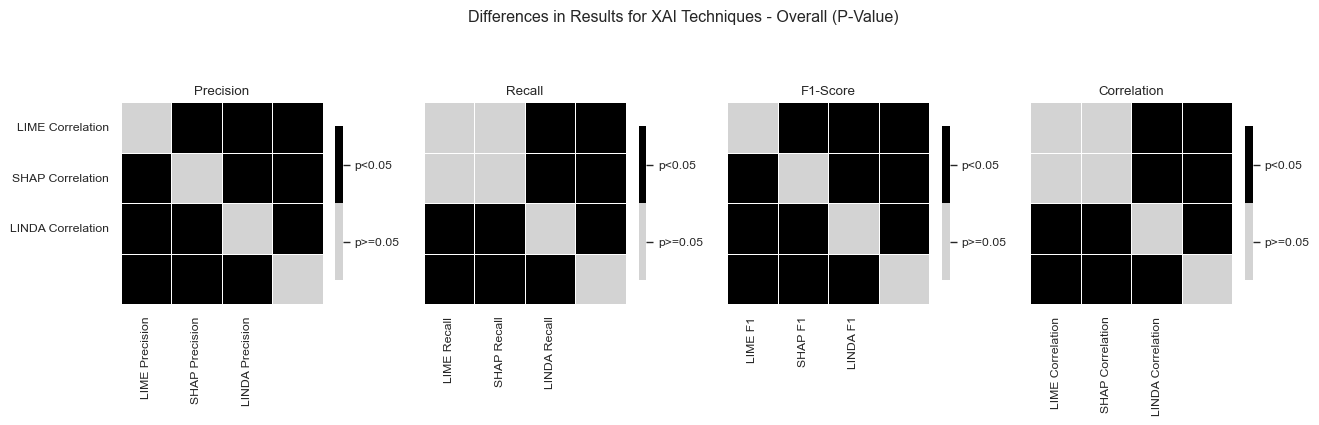

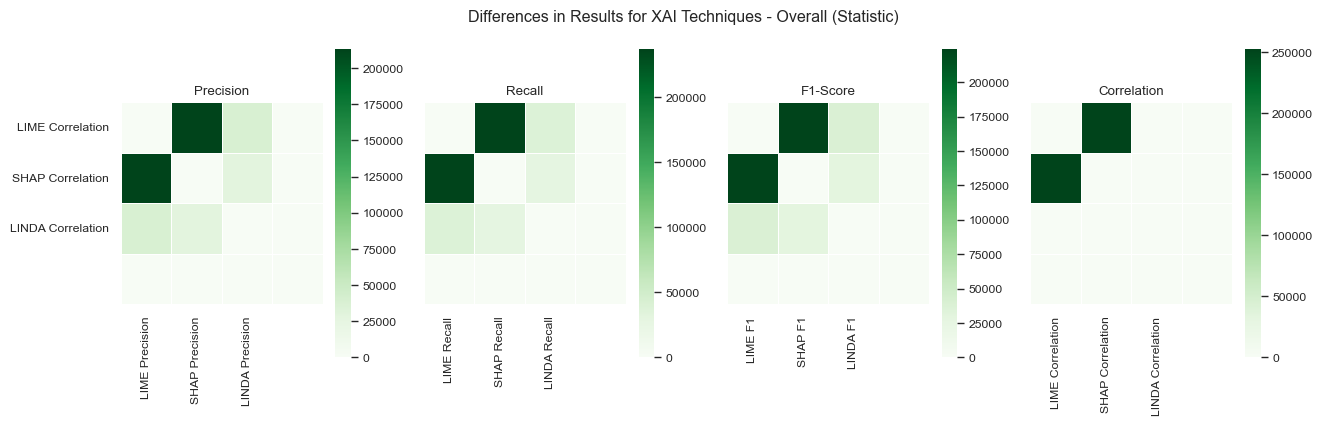

single_agg


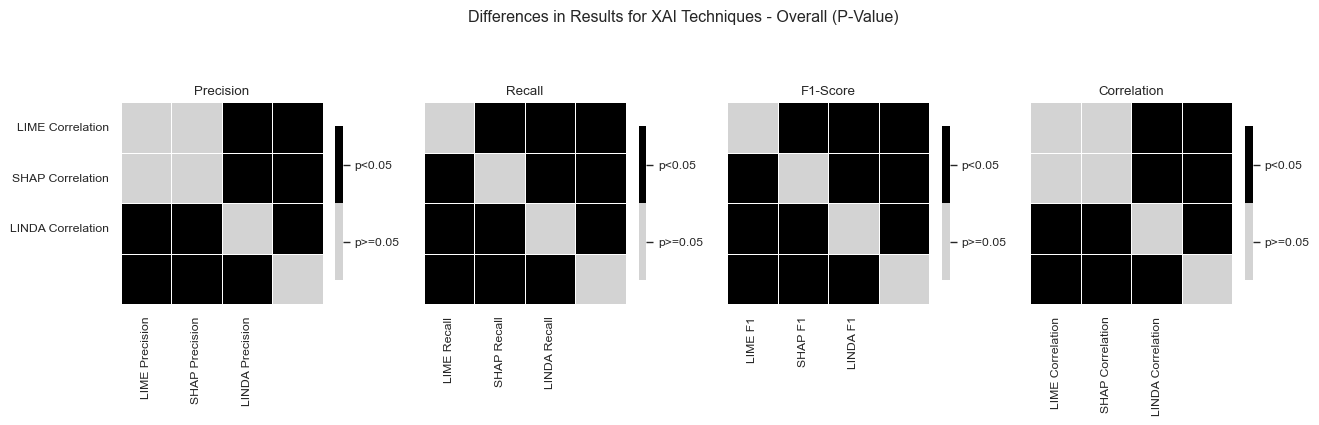

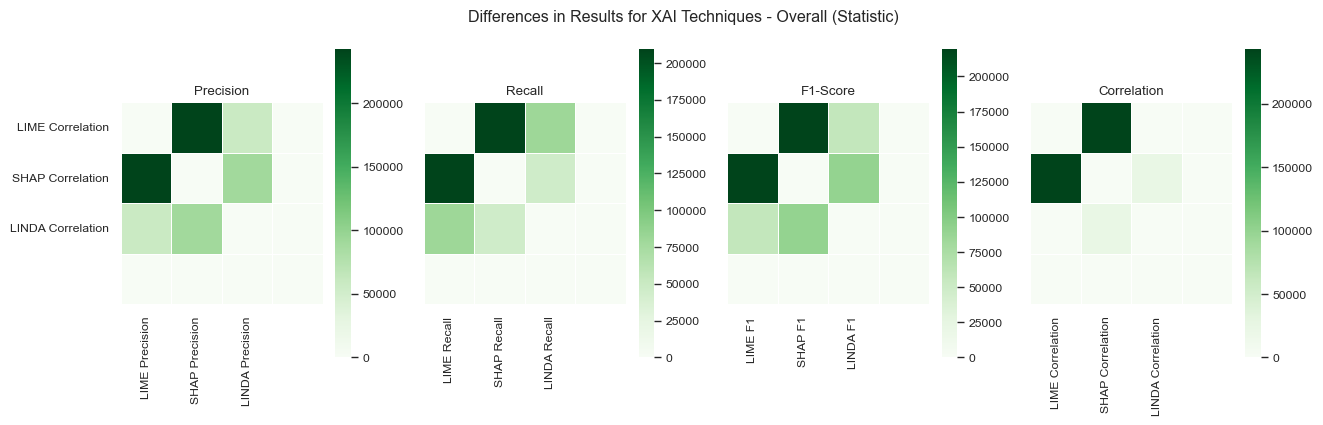

In [23]:
metrics = [el_precision_columns, el_recall_columns, el_f1_columns, el_corr_columns]
metric_name = ["Precision", "Recall", "F1-Score", "Correlation"]

colors = ["lightgray", "black"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

df_list = []

el_results = el_results.fillna(0)

el_grouped = el_results.groupby("Preprocessing")
df_list = []

for index, group in el_grouped:
    print(index)
    
    fig, ax = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
    fig2, ax2 = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))

    for i in range(len(metrics)):
        pval_mat = np.zeros((len(metrics), len(metrics)))
        stat_mat = np.zeros((len(metrics), len(metrics)))
        ind = np.diag_indices_from(pval_mat)
        pval_mat[ind] = 1
        
        metric_df = []

        for comb in itertools.combinations(metrics[i], 2):
            res = scipy.stats.wilcoxon(group[comb[0]], group[comb[1]], zero_method="zsplit", method="approx")
            l1 = list(metrics[i]).index(comb[0])
            l2 = list(metrics[i]).index(comb[1])

            pval = res.pvalue
            statistic = res.statistic
            zstatistic = res.zstatistic

            pval_mat[l1][l2] = pval
            pval_mat[l2][l1] = pval

            stat_mat[l1][l2] = statistic
            stat_mat[l2][l1] = statistic

            metric_df.append([index, comb[0], comb[1], round(statistic), round(zstatistic, 2), round(pval, 2)])

        mask = np.triu(pval_mat)
        sig = np.where(pval_mat<0.05, 1, 0)

        hmp=sns.heatmap(sig, square=True, annot=False, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .5}, 
                    xticklabels = metrics[i], yticklabels = metrics[i], ax = ax[i])

        sns.heatmap(stat_mat, square = True, annot=False, linewidths = 0.5, cmap="Greens", 
                   xticklabels = metrics[i], yticklabels = metrics[i], ax = ax2[i])


        colorbar = hmp.collections[0].colorbar
        colorbar.set_ticks([0.25,0.75])
        colorbar.set_ticklabels(['p>=0.05', 'p<0.05' ])

        ax[i].title.set_text(metric_name[i])
        ax2[i].title.set_text(metric_name[i])

        for entry in metric_df:
            xai1 = entry[1]
            xai2 = entry[2]
            entry[1] = xai1.split(" ")[0]
            entry[2] = xai2.split(" ")[0]

        metric_df = pd.DataFrame(metric_df, columns = ["Preprocessing", "XAI1", "XAI2", metric_name[i]+" Test Statistic", 
                                                       metric_name[i]+" Z", metric_name[i]+" P-Value"])
        metric_df = metric_df.set_index(["Preprocessing", "XAI1", "XAI2"])
        df_list.append(metric_df)

    fig.suptitle("Differences in Results for XAI Techniques - Overall (P-Value)")
    fig2.suptitle("Differences in Results for XAI Techniques - Overall (Statistic)")

    plt.show()

In [24]:
df = pd.concat(df_list, axis=1, ignore_index=False)#, join="inner")
df[df.columns].round(1)#.set_index(["XAI1", "XAI2", "Metric"])
df.to_csv("el_significance_test.csv")

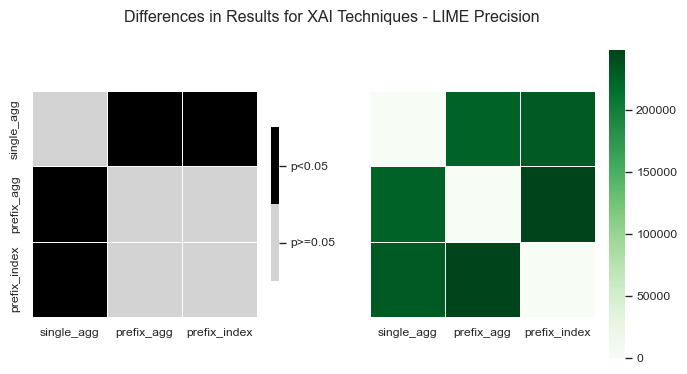

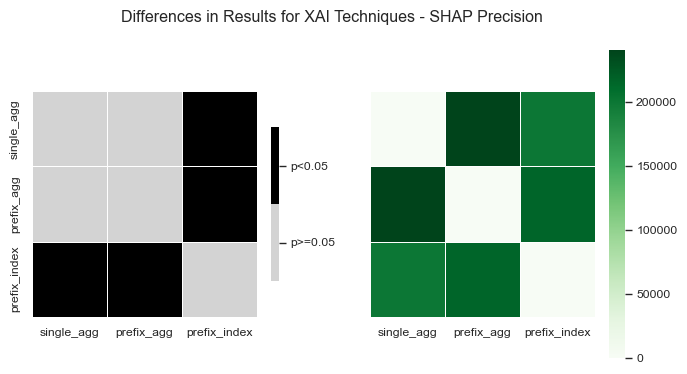

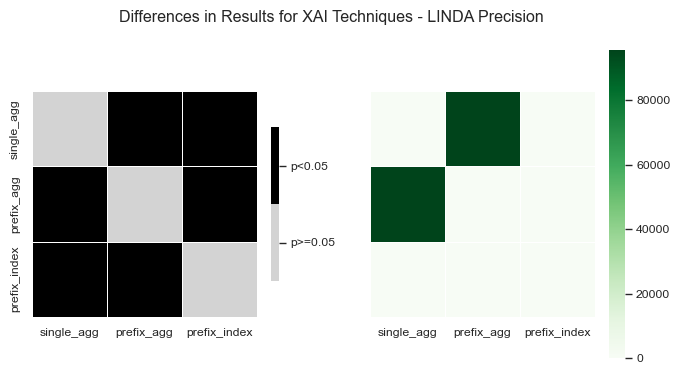

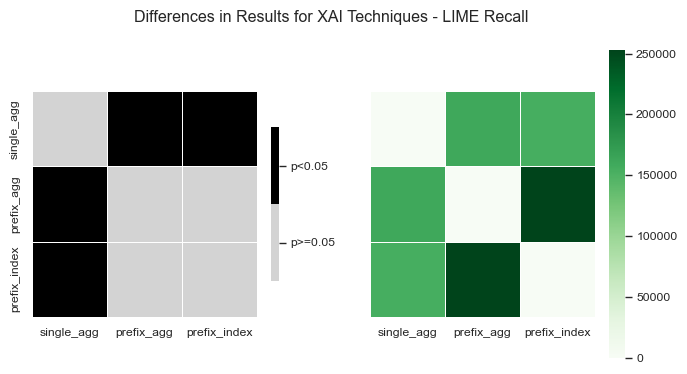

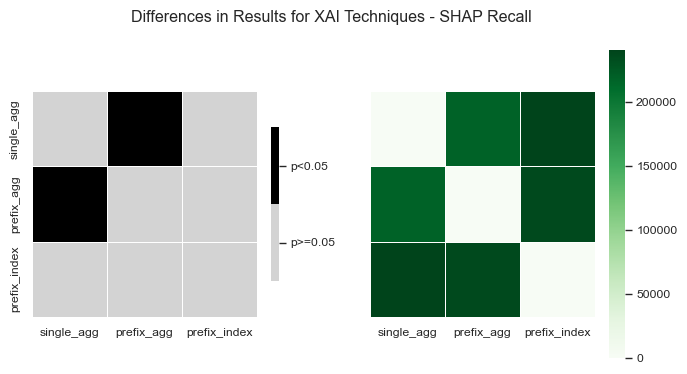

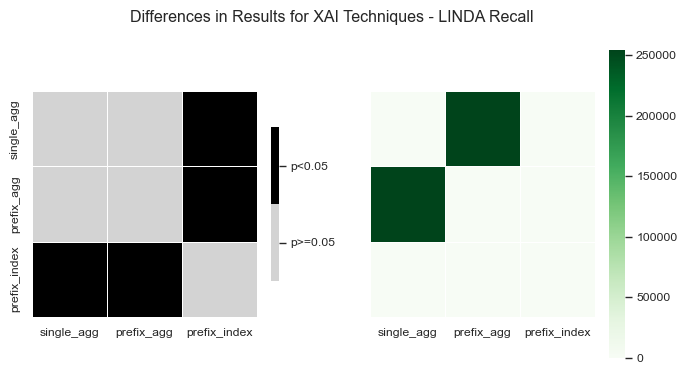

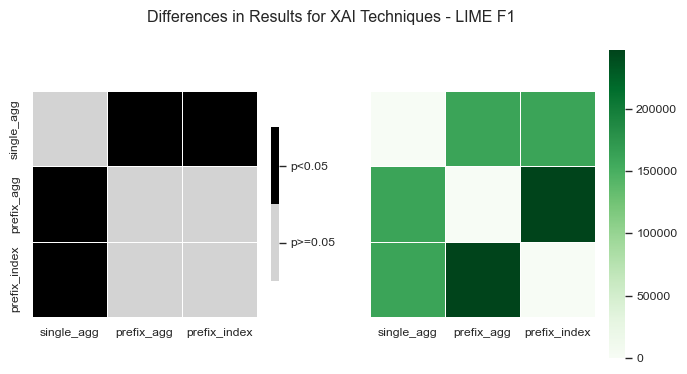

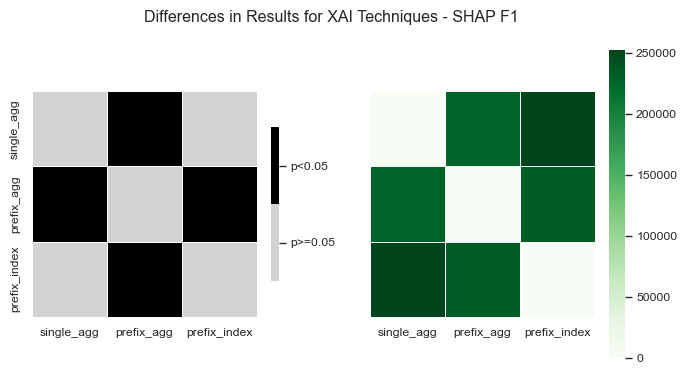

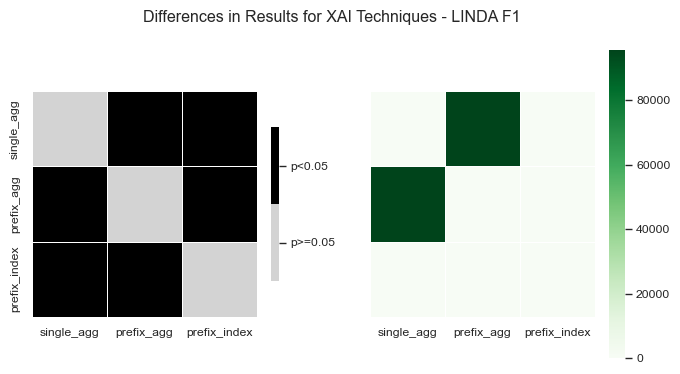

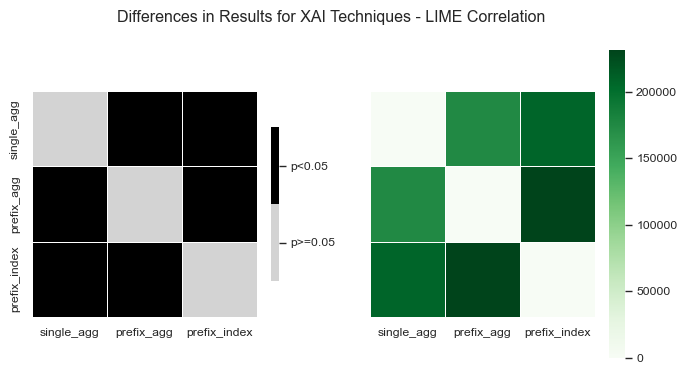

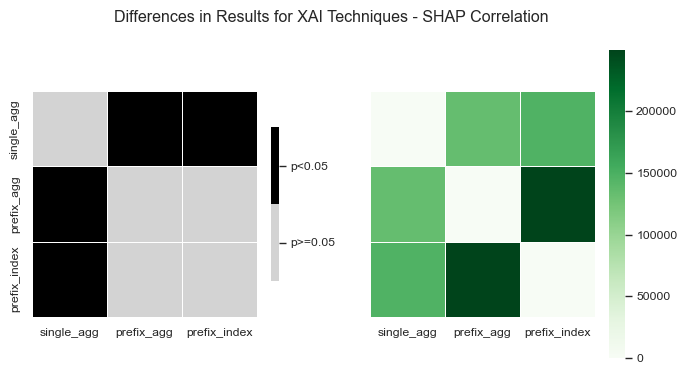

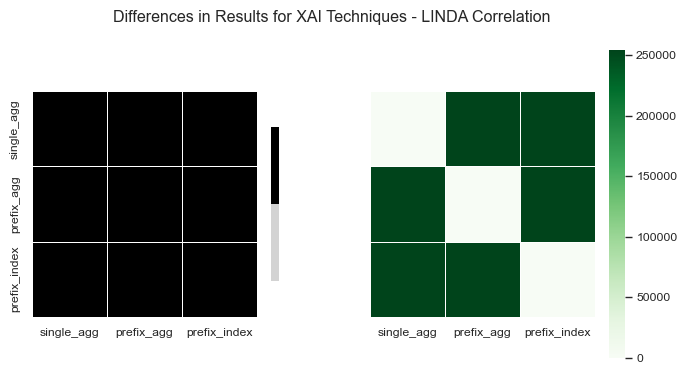

In [25]:
for metric in np.array(metrics).flatten():
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
    
    pval_mat = np.zeros((len(el_grouped), len(el_grouped)))
    stat_mat = np.zeros((len(el_grouped), len(el_grouped)))
    ind = np.diag_indices_from(pval_mat)
    pval_mat[ind] = 1
    
    metric_df = []

    for comb in itertools.combinations(el_grouped, 2):
        pre_1 = comb[0][0]
        group_1 = comb[0][1]
        pre_2 = comb[1][0]
        group_2 = comb[1][1]
                
        res = scipy.stats.wilcoxon(group_1[metric], group_2[metric], zero_method="zsplit", method="approx")
        l1 = preprocs.index(pre_1)
        l2 = preprocs.index(pre_2)

        pval = res.pvalue
        statistic = res.statistic
        zstatistic = res.zstatistic

        pval_mat[l1][l2] = pval
        pval_mat[l2][l1] = pval

        stat_mat[l1][l2] = statistic
        stat_mat[l2][l1] = statistic

        metric_df.append([pre_1, pre_2, round(statistic), round(zstatistic, 2), round(pval, 2)])
    
    mask = np.triu(pval_mat)
    sig = np.where(pval_mat<0.05, 1, 0)

    hmp=sns.heatmap(sig, square=True, annot=False, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .5}, 
                xticklabels = preprocs, yticklabels = preprocs, ax = ax[0])

    sns.heatmap(stat_mat, square = True, annot=False, linewidths = 0.5, cmap="Greens", 
               xticklabels = preprocs, yticklabels = preprocs, ax = ax[1])


    colorbar = hmp.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['p>=0.05', 'p<0.05' ])

    for entry in metric_df:
        xai1 = entry[0]
        xai2 = entry[1]
        entry[0] = xai1.split(" ")[0]
        entry[1] = xai2.split(" ")[0]

    metric_df = pd.DataFrame(metric_df, columns = ["XAI1", "XAI2", metric+" Test Statistic", 
                                                   metric+" Z", metric+" P-Value"])
    metric_df = metric_df.set_index(["XAI1", "XAI2"])
    df_list.append(metric_df)

    fig.suptitle("Differences in Results for XAI Techniques - "+metric)

    plt.show()

In [26]:
metric_df

LINDA Correlation Test Statistic  \
XAI1         XAI2                                             
prefix_agg   prefix_index                            254268   
             single_agg                              254268   
prefix_index single_agg                              254268   

                           LINDA Correlation Z  LINDA Correlation P-Value  
XAI1         XAI2                                                          
prefix_agg   prefix_index                  0.0                        1.0  
             single_agg                    0.0                        1.0  
prefix_index single_agg                    0.0                        1.0

# All Results

In [27]:
cls_order = [ "Model Accuracy", "F1 Score","LIME Precision", "LIME Recall", "SHAP Precision", "SHAP Recall", 
             "LINDA Precision", "LINDA Recall","ACV Precision", "ACV Recall"]
cls_results.groupby(["Model", "Dataset"]).mean()[cls_order].round(4)

Model Accuracy  F1 Score  LIME Precision  \
Model         Dataset                                                   
decision_tree Adult Income           0.8003    0.8106          0.9500   
              Breast Cancer          0.9062    0.8846          1.0000   
              COMPAS                 0.7078    0.6892          0.9650   
              Diabetes               0.7160    0.7416          0.8800   
              Iris                   1.0000    1.0000          1.0000   
              Mushroom               1.0000    1.0000          0.4700   
              Nursery                1.0000    1.0000          1.0000   
logit         Adult Income           0.8062    0.8128          1.0000   
              Breast Cancer          0.9844    0.9818          0.7900   
              COMPAS                 0.7262    0.7172          0.5700   
              Diabetes               0.7160    0.6933          0.5333   
              Iris                   1.0000    1.0000          0.8654   
              Mushroom               1.0000    1.0000          1.0000   
              Nursery                1.0000    1.0000          1.0000   
nb            Adult Income           0.7820    0.7998          0.1500   
              Breast Cancer          0.9375    0.9231          0.3242   
              COMPAS                 0.7262    0.7192          0.0500   
              Diabetes               0.6914    0.6575          0.6550   
              Iris                   1.0000    1.0000          0.8269   
              Mushroom               0.9949    0.9948          0.0590   
              Nursery                1.0000    1.0000          1.0000   

                             LIME Recall  SHAP Precision  SHAP Recall  \
Model         Dataset                                                   
decision_tree Adult Income        0.1536          1.0000       0.2500   
              Breast Cancer       0.4325          1.0000       0.5000   
              COMPAS              0.2487          1.0000       0.1429   
              Diabetes            0.2967          1.0000       0.5000   
              Iris                1.0000          1.0000       1.0000   
              Mushroom            0.0582          1.0000       0.2500   
              Nursery             1.0000          1.0000       1.0000   
logit         Adult Income        1.0000          1.0000       1.0000   
              Breast Cancer       0.2450          0.0000       0.0000   
              COMPAS              0.5700          1.0000       1.0000   
              Diabetes            0.5400          0.3333       1.0000   
              Iris                0.9231          1.0000       1.0000   
              Mushroom            1.0000          0.5000       1.0000   
              Nursery             1.0000          1.0000       1.0000   
nb            Adult Income        0.1500          0.6900       0.6850   
              Breast Cancer       0.3383          0.3033       0.2983   
              COMPAS              0.0458          0.7900       0.8258   
              Diabetes            0.6633          0.8200       0.8283   
              Iris                0.7885          0.9423       0.9423   
              Mushroom            0.1950          0.8250       0.6057   
              Nursery             1.0000          1.0000       1.0000   

                             LINDA Precision  LINDA Recall  ACV Precision  \
Model         Dataset                                                       
decision_tree Adult Income            0.4738        0.4194         0.6158   
              Breast Cancer           0.0862        0.4325         0.2600   
              COMPAS                  0.3330        0.1145         0.7001   
              Diabetes                0.4867        0.4200         0.5167   
              Iris                    0.2340        0.8846         0.7500   
              Mushroom                0.0464        1.0000         0.2417   
              Nursery                 0.0370        1

# Other

________________________________________________________
bpic2012 decision_tree single_agg
single
F1 Score: 0.4531779491376789
bpic2012 decision_tree prefix_agg
prefix
F1 Score: 0.5744199324846875
bpic2012 decision_tree prefix_index
prefix
F1 Score: 0.5557332055585257


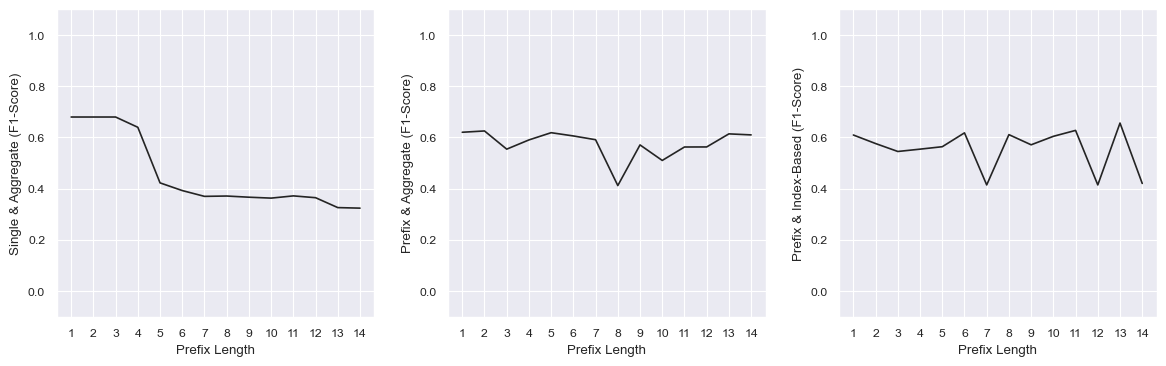

bpic2012 logit single_agg
single
F1 Score: 0.38189855206176543
bpic2012 logit prefix_agg
prefix
F1 Score: 0.4842990400438583
bpic2012 logit prefix_index
prefix
F1 Score: 0.2844119408820578


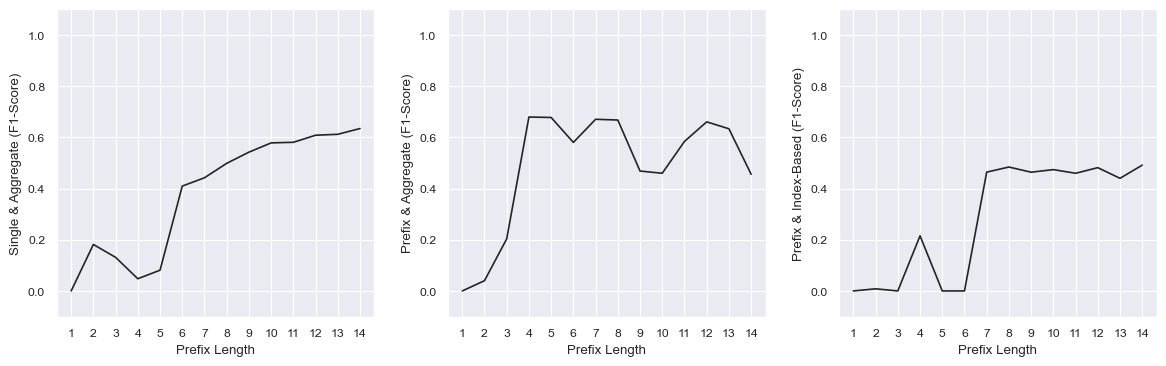

bpic2012 nb single_agg
single
F1 Score: 0.21283027989679873
bpic2012 nb prefix_agg
prefix
F1 Score: 0.29133917153796685
bpic2012 nb prefix_index
prefix
F1 Score: 0.4228874329456604


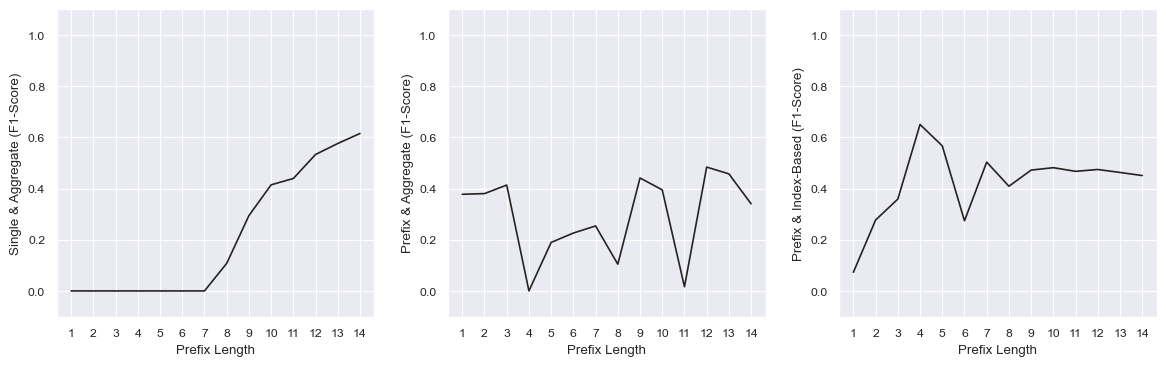

________________________________________________________
sepsis_cases decision_tree single_agg
single
F1 Score: 0.0
sepsis_cases decision_tree prefix_agg
prefix
F1 Score: 0.21313729253161692
sepsis_cases decision_tree prefix_index
prefix
F1 Score: 0.23497201318567043


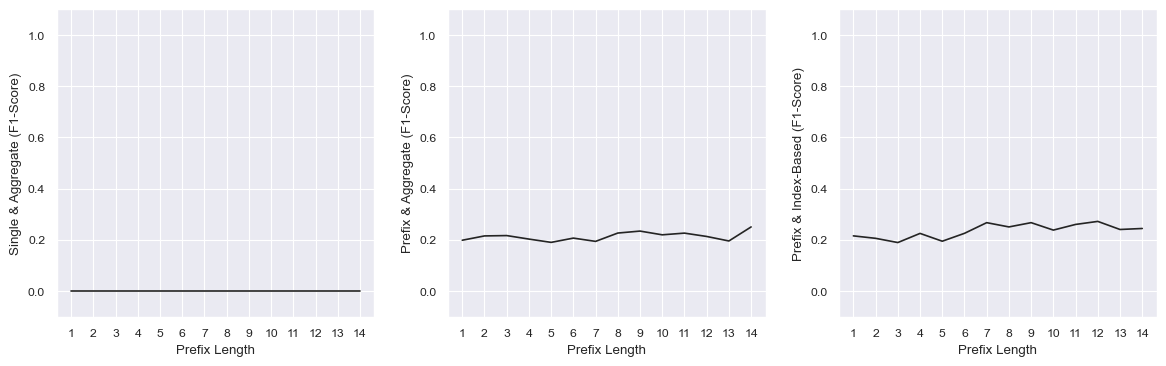

sepsis_cases logit single_agg
single
F1 Score: 0.21954231228739976
sepsis_cases logit prefix_agg
prefix
F1 Score: 0.2594798252894316
sepsis_cases logit prefix_index
prefix
F1 Score: 0.2361758819986548


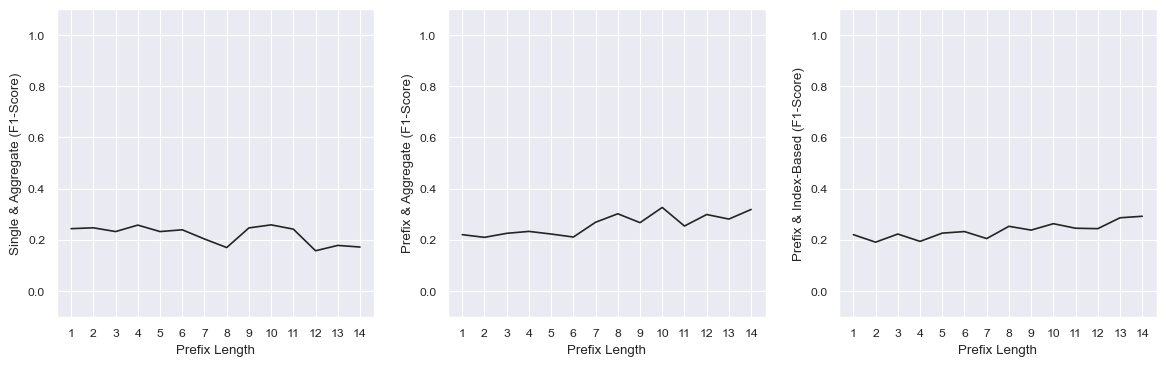

sepsis_cases nb single_agg
single
F1 Score: 0.19666799898973064
sepsis_cases nb prefix_agg
prefix
F1 Score: 0.19958386595801078
sepsis_cases nb prefix_index
prefix
F1 Score: 0.22128426756775418


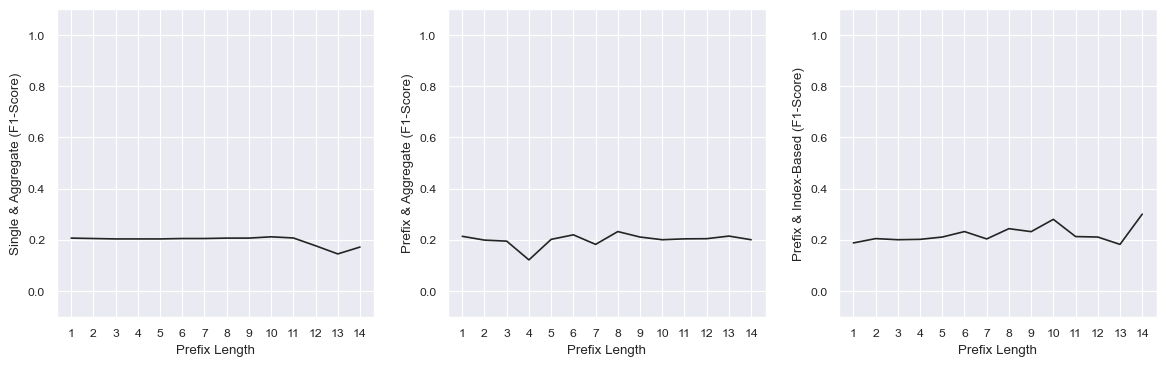

________________________________________________________
production decision_tree single_agg
single
F1 Score: 0.5568640068640069
production decision_tree prefix_agg
prefix
F1 Score: 0.7086140983199807
production decision_tree prefix_index
prefix
F1 Score: 0.6785869699779475


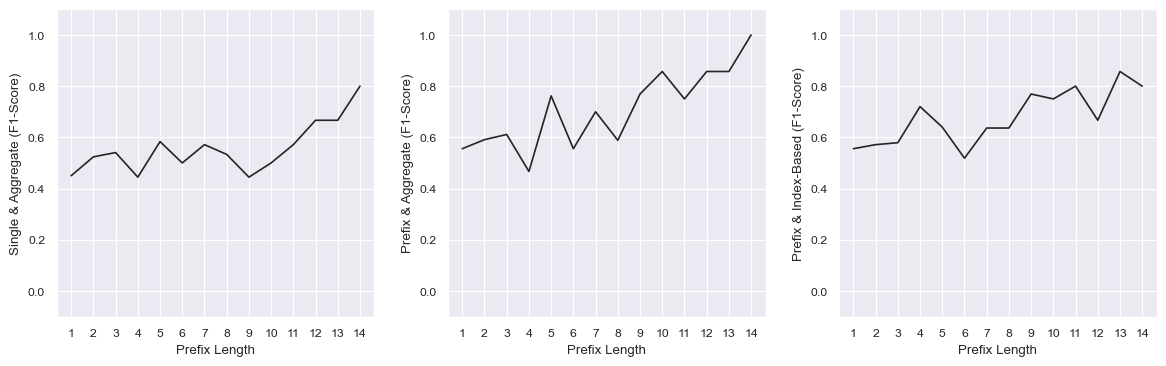

production logit single_agg
single
F1 Score: 0.5810076785411329
production logit prefix_agg
prefix
F1 Score: 0.5404892100380821
production logit prefix_index
prefix
F1 Score: 0.6266870759902119


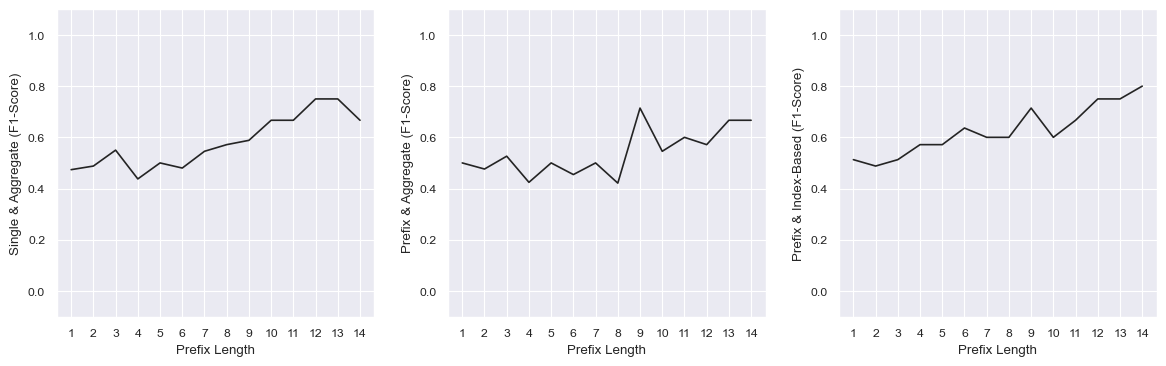

production nb single_agg
single
F1 Score: 0.33600863422292
production nb prefix_agg
prefix
F1 Score: 0.5320307069165308
production nb prefix_index
prefix
F1 Score: 0.6203841434213999


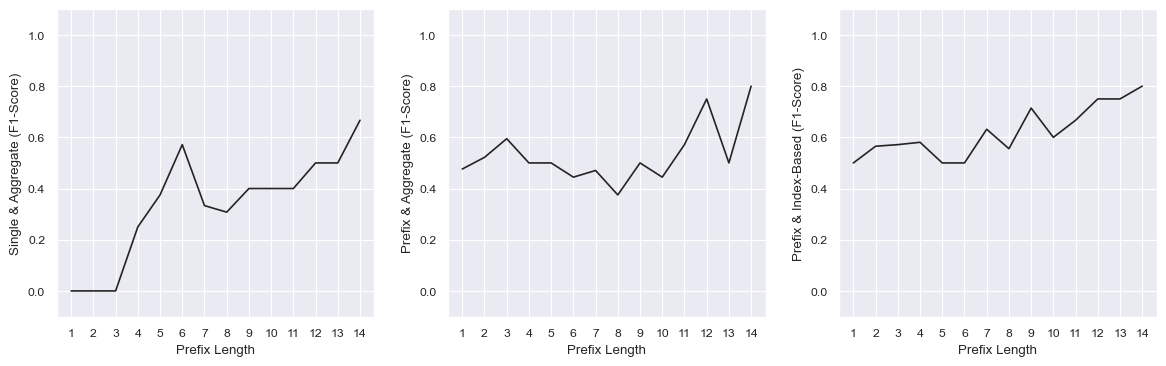

In [28]:
dataset_names = ["bpic2012", "sepsis_cases", "production"]
models= ["decision_tree", "logit", "nb"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]

dataset_ref = {
    "bpic2012" : "bpic2012_accepted",
    "sepsis_cases": "sepsis_cases_1",
    "production" : "production"
}

preproc_ref = {
    "single_agg": "Single & Aggregate",
    "prefix_agg": "Prefix & Aggregate",
    "prefix_index": "Prefix & Index-Based"
}

sns.set_theme(context = "paper", style="darkgrid")
sns.set_palette("gray")

for dataset_name in dataset_names:
    print("________________________________________________________")
    
    dataset = dataset_ref[dataset_name]
    dataset_manager = DatasetManager(dataset)
    data = dataset_manager.read_dataset()

    min_prefix_length = 1
    max_prefix_length = 14

    dt_train_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/train_prefixes.csv" % (dataset_name)))
    dt_test_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/test_prefixes.csv" % (dataset_name)))
    dt_val_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/val_prefixes.csv" % (dataset_name)))
        
    dt_train_prefixes = pd.concat([dt_train_prefixes, dt_val_prefixes])

    dt_train_prefixes = dataset_manager.generate_prefix_data(dt_train_prefixes, min_prefix_length, max_prefix_length)
    dt_test_prefixes = dataset_manager.generate_prefix_data(dt_test_prefixes, min_prefix_length, max_prefix_length)
    
    
    for model in models:
        fig, ax = plt.subplots(1, 3, figsize=(12,4))
        for preproc in preprocs:
            idx = preprocs.index(preproc)
            print(dataset_name, model, preproc)
            
            if "single" in preproc:
                bucket_method = "single"
            else:
                bucket_method = "prefix"
            
            folder_loc = os.path.join(PATH, "%s/%s/%s" %(dataset_name,model,preproc))
            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])
            
            bucketer_args = {'encoding_method':"agg",
                         'case_id_col':dataset_manager.case_id_col, 
                         'cat_cols':[dataset_manager.activity_col], 
                         'num_cols':[], 
                         'random_state':22}                
            bucketer = BucketFactory.get_bucketer(bucket_method, **bucketer_args)

            bucket_assignments_train = bucketer.fit_predict(dt_train_prefixes)
            bucket_assignments_test = bucketer.predict(dt_test_prefixes)
            
            f1 = []

            if bucket_method=="single":
                relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == 1]
                X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                y_test = dataset_manager.get_label_numeric(X_test)

                pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_1.joblib'))
                
                for bucket in range(1, max_prefix_length+1):
                    bucket_test = X_test[X_test["prefix_nr"]==bucket]
                    bucket_y = dataset_manager.get_label_numeric(bucket_test)
                    preds = pipeline.predict(bucket_test)
                    f1.append(f1_score(bucket_y, preds))

            else:
                for bucket in range(1, num_buckets+1):
                    relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == bucket]
                    X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                    y_test = dataset_manager.get_label_numeric(X_test)
                    
                    pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_%s.joblib' %(bucket)))
                    
                    preds = pipeline.predict(X_test)
                    
                    f1.append(f1_score(y_test, preds))

            print("F1 Score:", np.mean(f1))
            sns.lineplot(x=np.arange(1, max_prefix_length+1, 1), y=f1, ax=ax[idx], label="Precision", legend=False)
            ax[idx].set_xticks(np.arange(1, max_prefix_length+1, 1))
            ax[idx].set_ylim(-0.1, 1.1)
            ax[idx].set_xlabel("Prefix Length")
            ax[idx].set_ylabel(preproc_ref[preproc]+" (F1-Score)")
            
        filename = "%s___%s_acc.pdf"%(dataset_name,model)
        fig.tight_layout(pad=2)
        plt.savefig(os.path.join('figures', filename), format='pdf')
        plt.show()

In [29]:
results

,Case ID,Actual,Prefix Length,Prediction,Prediction Probability,SHAP Subset Stability,SHAP Weight Stability,SHAP Adjusted Weight Stability,LIME Subset Stability,LIME Weight Stability,...,SHAP Correlation,LIME Precision,LIME Recall,LIME Correlation,Model Accuracy,F1 Score,Model,Dataset,Dataset Type,Preprocessing
0,B,0,1,0,1.000000,1.000000,0.993077,0.993077,0.791340,0.923397,...,0.143194,0.000000,0.000000,0.583578,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
1,MC,1,1,0,0.863422,0.831923,0.933630,0.933630,0.839886,0.965792,...,0.095679,0.000000,0.000000,0.567368,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
2,MO,0,1,0,1.000000,1.000000,0.995899,0.995899,0.738704,0.970990,...,0.145456,0.000000,0.000000,0.594343,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
3,OGA,0,1,1,0.999687,0.831923,0.997957,0.997957,0.751286,0.973320,...,0.202125,0.000000,0.000000,0.604449,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
4,PGA,1,1,1,0.999995,0.810378,0.995462,0.995462,0.801242,0.969989,...,0.207717,0.000000,0.000000,0.572231,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,HS_14,1,14,1,1.000000,1.000000,0.943334,0.943334,0.575620,0.854805,...,0.275089,0.200000,0.200000,0.194808,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
4,JV_14,0,14,0,1.000000,1.000000,0.970202,0.970202,0.761363,0.823035,...,0.279863,0.000000,0.000000,0.182534,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
5,OT_14,1,14,0,1.000000,1.000000,0.866129,0.866129,0.861637,0.900931,...,0.252521,0.000000,0.000000,0.212349,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index
6,QHA_14,0,14,1,1.000000,1.000000,0.918526,0.918526,0.357927,0.779680,...,0.240122,0.000000,0.000000,0.209358,0.5625,0.631579,nb,Sepsis Cases,Classification,prefix_index


In [30]:
dataset_names = ["bpic2012", "production", "sepsis_cases"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
models= ["decision_tree", "logit", "nb"]

for preproc in preprocs:
    for dataset_name in dataset_names:
        for model in models:
            print("________________________________________________________________________")
            print(dataset_name, model, preproc)
            folder_loc = os.path.join(PATH, "%s/%s/%s/" %(dataset_name,model,preproc))

            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

            vec_lens = []
            
            results = []
            
            for bucket in range(1, num_buckets+1):
                sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
                results.append(pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep=";"))
                vec_lens.append(sample.shape[1])

            if len(vec_lens) == 1:
                vec_lens = vec_lens * 14

            pref_lens = np.arange(1,15,1)
            x_ticks = np.arange(1,15,1)
            
            results = pd.concat(results)

            print ("SHAP Precision")
            print("Overall", np.mean(results["SHAP Precision"]))

            print ("SHAP Recall")
            print("Overall", np.mean(results["SHAP Recall"]))

            print ("SHAP Correlation")
            print("Overall", np.mean(results["SHAP Correlation"]))

            print ("LIME Precision")
            print("Overall", np.mean(results["LIME Precision"]))

            print ("LIME Recall")
            print("Overall", np.mean(results["LIME Recall"]))

            print ("LIME Correlation")
            print("Overall", np.mean(results["LIME Correlation"]))



________________________________________________________________________
bpic2012 decision_tree single_agg
SHAP Precision
Overall 1.0
SHAP Recall
Overall 1.0
SHAP Correlation
Overall 1.0
LIME Precision
Overall 0.90625
LIME Recall
Overall 0.9107142857142857
LIME Correlation
Overall 0.12894085705224767
________________________________________________________________________
bpic2012 logit single_agg
SHAP Precision
Overall 0.0
SHAP Recall
Overall 0.0
SHAP Correlation
Overall -0.06547181356287855
LIME Precision
Overall 0.7559523809523808
LIME Recall
Overall 1.0
LIME Correlation
Overall 0.7106537106011455
________________________________________________________________________
bpic2012 nb single_agg
SHAP Precision
Overall 0.7321428571428571
SHAP Recall
Overall 0.8705357142857143
SHAP Correlation
Overall 0.46071504798967505
LIME Precision
Overall 0.03571428571428571
LIME Recall
Overall 0.03571428571428571
LIME Correlation
Overall 0.5683672754215227
___________________________________________

SHAP Precision
Overall 0.12946428571428573
SHAP Recall
Overall 0.09523809523809522
SHAP Correlation
Overall 0.31078387251797723
LIME Precision
Overall 0.48511904761904756
LIME Recall
Overall 0.525297619047619
LIME Correlation
Overall 0.6428643281982295
________________________________________________________________________
sepsis_cases nb prefix_index
SHAP Precision
Overall 0.6919642857142857
SHAP Recall
Overall 0.6640731292517007
SHAP Correlation
Overall 0.2672476023598201
LIME Precision
Overall 0.055672799422799416
LIME Recall
Overall 0.1016941391941392
LIME Correlation
Overall 0.45370113440952237
